# California Traffic Accidents Analysis
### Group Members: Shawn Prasad, Blasius Boniarga, Heral Kumar, Vivaan Jhaveri
---

## Introduction

The initial dataset used in this analysis is the **US Accidents dataset** available on [Kaggle](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents). In our analysis, we will be focusing on a sampled dataset of traffic accidents in California. The dataset, stored in the file `cali_accidents_sampled.csv`, comprises of around 113,000 accident records. These sources include traffic sensors, law enforcement reports, and weather stations, ensuring a comprehensive record of accident events.

### Background and Context

Traffic accidents pose a significant public safety challenge, particularly in busy regions such as California. By understanding when and where these accidents occur and analyzing their severity, decision-makers can design more effective strategies for emergency response and road safety improvement.

### Motivation for Analysis

The key motivations behind this analysis are:
- **Localized Insights:** Focusing on California allows us to obtain region-specific insights that can lead to targeted interventions.
- **Temporal Patterns:** Investigating the trends over time helps identify any seasonal or periodic fluctuations in accident occurrences.
- **Severity Distribution:** Evaluating accident severity levels aids in distinguishing between minor incidents and those requiring urgent attention.
- **Data-Driven Policy:** The insights derived can support resource allocation, preventive measures, and policy development aimed at reducing traffic accidents.

### Variables Overview

Key variables included in the dataset are:
- **Start_Time:** The timestamp indicating when the accident occurred.
- **Severity:** A numerical indicator of how severe the accident was.
- **City/State:** Geographic identifiers for locating the accident.
- **Weather Conditions:** Variables capturing weather information (e.g., temperature, precipitation) at the time of the accident.
- **Additional Attributes:** Other contextual factors such as road conditions, intersection details, or any special circumstances surrounding the accident.


The following sections describe the data cleaning procedures, the applied transformations, and provide comprehensive visualizations that facilitate an in-depth exploratory analysis of the dataset.

Comment about this part (I think for each part, all of us can leave a comment for improvement):
- **"Should we explain more, why exactly we choose California? why not other region?" -Blasius**
- **"I think we should have more background about the original data, like the time frame, Data collection methodolgy, and we should clrealy explain all of the variable, this is from the rubric. -Blasius**

In [231]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(lubridate)
library(readr)
library(tidyr)
#added libraries
library(scales)
library(gridExtra)
library(leaflet)
library(corrplot)
library(knitr)
# Load the California traffic accident dataset
california_data <- read_csv("data/cali_accidents_sampled.csv")

# Display the head and summary of the dataset to understand its contents
head(california_data)
summary(california_data)

Rows: 113274 Columns: 46
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (17): ID, Source, Description, Street, City, County, State, Zipcode, Co...
dbl  (13): Severity, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), T...
lgl  (13): Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Ro...
dttm  (3): Start_Time, End_Time, Weather_Timestamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),⋯,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>
A-5006183,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.66119,-120.4928,34.66119,-120.4924,0.022,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Day,Day,Day,Day
A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.39548,-118.9852,35.39548,-118.9860,0.046,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Night,Night,Night,Night
A-4535214,Source1,2,2022-02-18 16:53:00,2022-02-18 18:59:00,32.77164,-117.1614,32.73086,-117.1547,2.845,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
A-1506844,Source3,2,2020-06-15 08:17:29,2020-06-15 08:47:18,34.24327,-118.4245,NA,NA,0.000,⋯,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,Day,Day,Day,Day
A-3983218,Source1,2,2022-03-22 07:22:30,2022-03-22 11:12:00,33.12097,-117.3215,33.10005,-117.3086,1.626,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
A-19908,Source2,2,2016-09-13 22:15:22,2016-09-13 22:45:22,38.65413,-121.3829,NA,NA,0.000,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Night,Night,Night,Night


      ID               Source             Severity    
 Length:113274      Length:113274      Min.   :1.000  
 Class :character   Class :character   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :2.000  
                                       Mean   :2.166  
                                       3rd Qu.:2.000  
                                       Max.   :4.000  
                                                      
   Start_Time                        End_Time                     
 Min.   :2016-03-22 21:28:47.00   Min.   :2016-03-22 22:58:47.00  
 1st Qu.:2018-11-18 08:37:47.00   1st Qu.:2018-11-18 09:22:22.00  
 Median :2020-11-07 16:54:45.00   Median :2020-11-07 19:07:37.50  
 Mean   :2020-05-18 06:54:58.22   Mean   :2020-05-18 08:56:58.30  
 3rd Qu.:2022-01-21 03:59:35.00   3rd Qu.:2022-01-21 04:46:40.25  
 Max.   :2023-03-31 21:53:00.00   Max.   :2023-03-31 23:58:00.00  
                                                                  
   Start_Lat       Start

In [232]:
clean_data <- na.omit(california_data)
clean_data$Severity <- ifelse(clean_data$Severity > 2, "Severe", "Minor")
clean_data$Severity <- factor(clean_data$Severity, levels = c("Minor", "Severe"))

### POSIX Time Conversion

For accurate temporal analysis, we must convert the `Start_Time` and `End_Time` columns into proper date-time objects. This conversion enables us to compute time differences (such as accident duration) and perform time series analyses. Additionally, we will create a new variable, `Month`, by extracting the month from `Start_Time` to help us identify temporal trends.

In [233]:
# Convert Start_Time and End_Time to POSIXct objects using the specified format
california_data$Start_Time <- as.POSIXct(california_data$Start_Time, format = "%Y-%m-%d %H:%M:%S")
california_data$End_Time   <- as.POSIXct(california_data$End_Time, format = "%Y-%m-%d %H:%M:%S")

# Calculate the duration of each california_data in seconds
california_data$duration <- as.numeric(difftime(california_data$End_Time, california_data$Start_Time, units = "secs"))

# Create a new column 'Month' by extracting the month from Start_Time
california_data <- california_data %>% mutate(Month = floor_date(Start_Time, "month"))

# Verify the changes by viewing the first few rows of the dataset
head(california_data)

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),⋯,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,duration,Month
<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dttm>
A-5006183,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.66119,-120.4928,34.66119,-120.4924,0.022,⋯,FALSE,FALSE,TRUE,FALSE,Day,Day,Day,Day,7785,2022-08-01
A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.39548,-118.9852,35.39548,-118.9860,0.046,⋯,FALSE,FALSE,FALSE,FALSE,Night,Night,Night,Night,8829,2020-12-01
A-4535214,Source1,2,2022-02-18 16:53:00,2022-02-18 18:59:00,32.77164,-117.1614,32.73086,-117.1547,2.845,⋯,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day,7560,2022-02-01
A-1506844,Source3,2,2020-06-15 08:17:29,2020-06-15 08:47:18,34.24327,-118.4245,NA,NA,0.000,⋯,TRUE,FALSE,FALSE,FALSE,Day,Day,Day,Day,1789,2020-06-01
A-3983218,Source1,2,2022-03-22 07:22:30,2022-03-22 11:12:00,33.12097,-117.3215,33.10005,-117.3086,1.626,⋯,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day,13770,2022-03-01
A-19908,Source2,2,2016-09-13 22:15:22,2016-09-13 22:45:22,38.65413,-121.3829,NA,NA,0.000,⋯,FALSE,FALSE,TRUE,FALSE,Night,Night,Night,Night,1800,2016-09-01


## Exploratory Data Analysis (EDA)

With the data cleaned and time variables properly converted, we now proceed to explore the dataset. In this section, we will:
- Examine summary statistics and visualize the distribution of accident duration.
- Analyze temporal trends by aggregating accidents on a monthly basis.
- Investigate the distribution of accident severity (if available).

These visualizations help reveal underlying trends and potential outliers that may require further investigation.

In [234]:
# 1. Summary Statistics for Accident Duration
duration_summary <- summary(california_data$duration)
print("Summary Statistics for Accident Duration (in seconds):")
print(duration_summary)

[1] "Summary Statistics for Accident Duration (in seconds):"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     330     2009     4592     7320     7853 31535999 


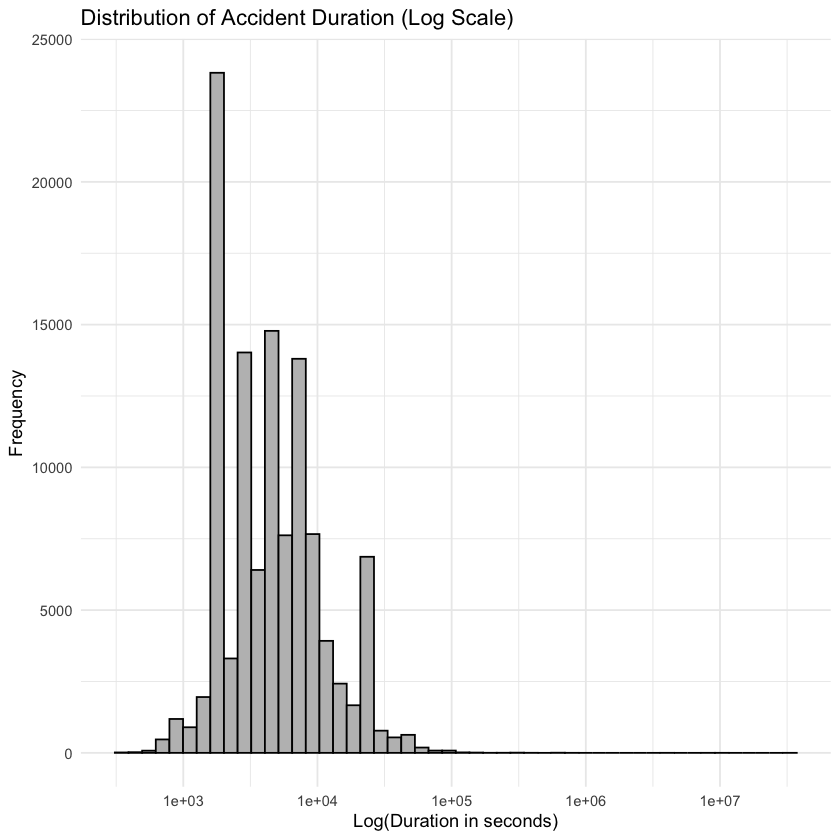

In [235]:
# Histogram of Accident Duration (log scale)
# Note: The histogram is plotted on a log scale to better visualize the distribution for long-duration accidents.

ggplot(california_data, aes(x = duration)) +
  geom_histogram(bins = 50, fill = "gray", color = "black") +
  scale_x_log10() +
  labs(
    title = "Distribution of Accident Duration (Log Scale)",
    x = "Log(Duration in seconds)",
    y = "Frequency"
  ) +
  theme_minimal()

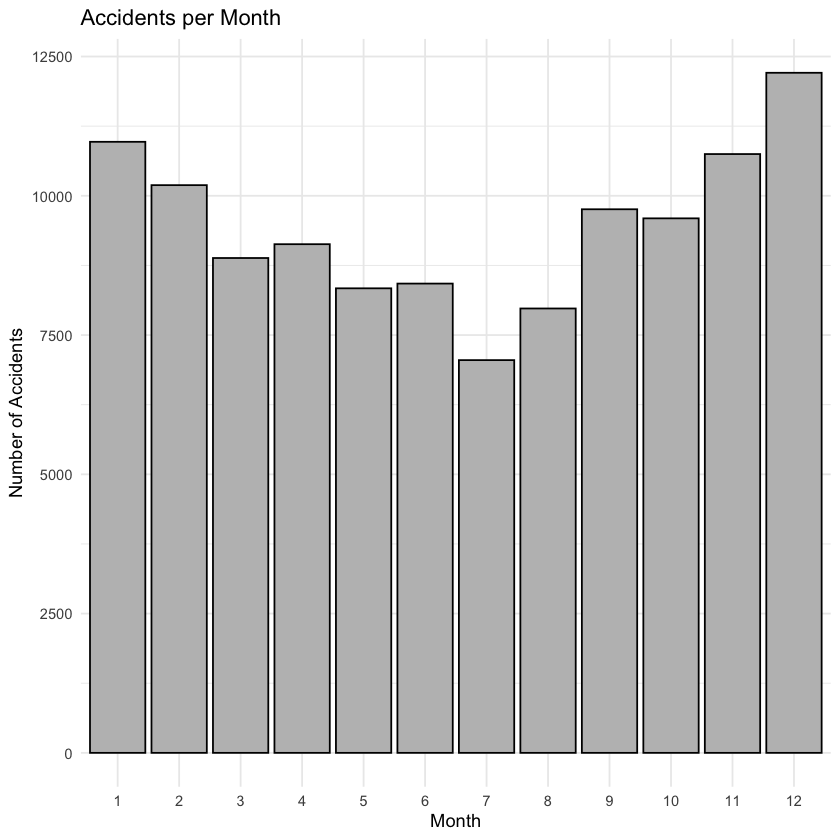

In [236]:
# Extract the month from the Start_Time
california_data$Month <- as.numeric(format(california_data$Start_Time, "%m"))

# Plot number of accidents per month
ggplot(california_data, aes(x = factor(Month))) +
  geom_bar(fill = "gray", color = "black") +
  labs(title = "Accidents per Month",
       x = "Month",
       y = "Number of Accidents") +
  theme_minimal()

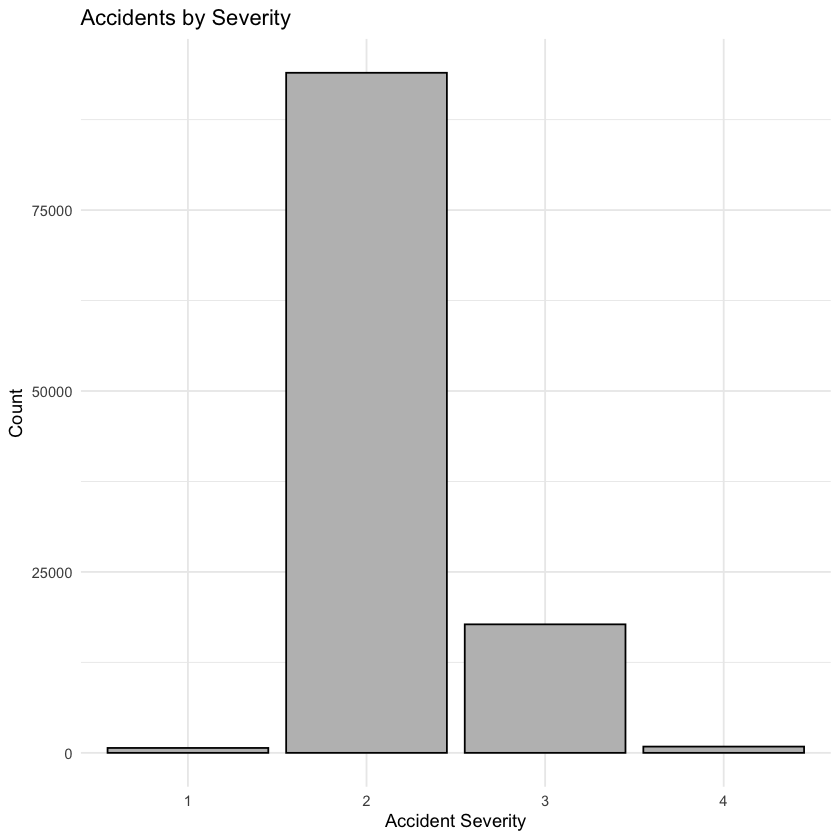

In [237]:
ggplot(california_data, aes(x = factor(Severity))) +
  geom_bar(fill = "gray", color = "black") +
  labs(title = "Accidents by Severity",
       x = "Accident Severity",
       y = "Count") +
  theme_minimal()

In [238]:
# severity as binary
california_data <- california_data %>%
  mutate(Severe = ifelse(Severity >= 3, "High", "Low"))
california_data$Severe <- factor(california_data$Severe, levels = c("Low", "High"))

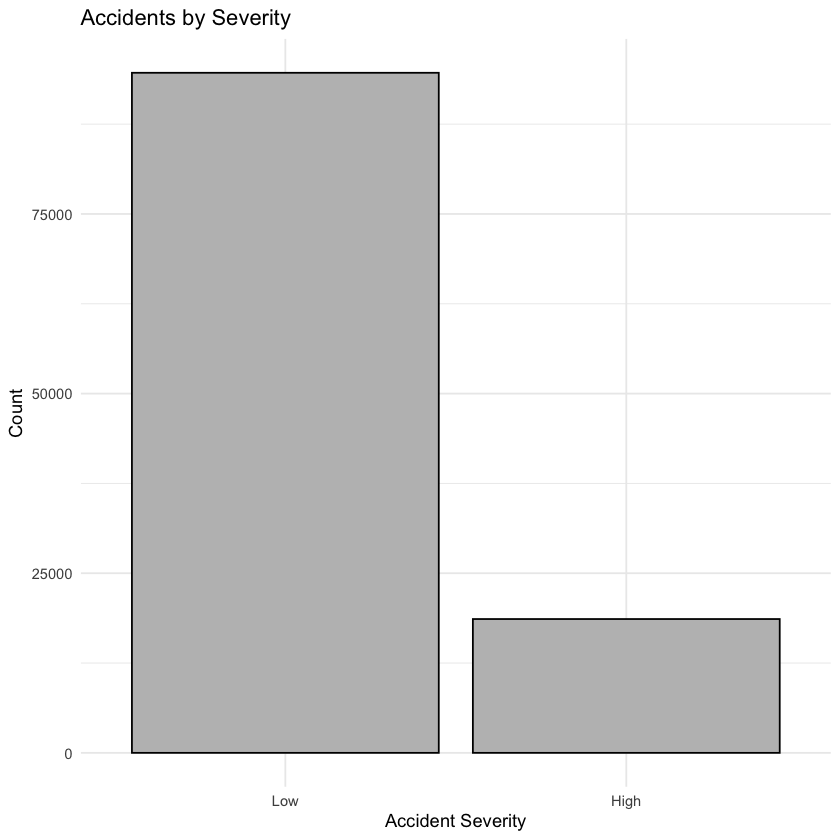

In [239]:
ggplot(california_data, aes(x = factor(Severe))) +
  geom_bar(fill = "gray", color = "black") +
  labs(title = "Accidents by Severity",
       x = "Accident Severity",
       y = "Count") +
  theme_minimal()
# make sense, the numbr of low severity accident is as expected to be lower. It could be that(yapping) 

In [240]:
num_vars <- california_data %>% 
  select(where(is.numeric)) %>% 
  select(-Severity) %>% 
  names()

cat_vars <- california_data %>%
  select(where(~ !is.numeric(.))) %>%
  select(-Start_Time, -End_Time, -Description, -Street, -ID) %>%
  names()

In [241]:
num_vars
cat_vars

[1] "Start_Lat"         "Start_Lng"         "End_Lat"          
 [4] "End_Lng"           "Distance(mi)"      "Temperature(F)"   
 [7] "Wind_Chill(F)"     "Humidity(%)"       "Pressure(in)"     
[10] "Visibility(mi)"    "Wind_Speed(mph)"   "Precipitation(in)"
[13] "duration"          "Month"

[1] "Source"                "City"                  "County"               
 [4] "State"                 "Zipcode"               "Country"              
 [7] "Timezone"              "Airport_Code"          "Weather_Timestamp"    
[10] "Wind_Direction"        "Weather_Condition"     "Amenity"              
[13] "Bump"                  "Crossing"              "Give_Way"             
[16] "Junction"              "No_Exit"               "Railway"              
[19] "Roundabout"            "Station"               "Stop"                 
[22] "Traffic_Calming"       "Traffic_Signal"        "Turning_Loop"         
[25] "Sunrise_Sunset"        "Civil_Twilight"        "Nautical_Twilight"    
[28] "Astronomical_Twilight" "Severe"

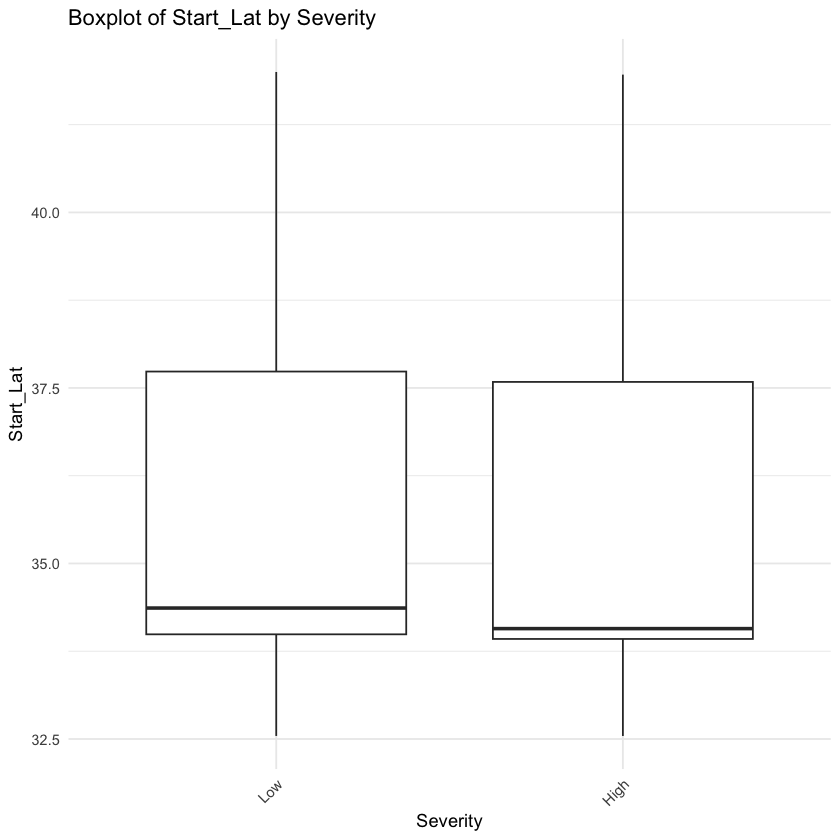

Warning message:
“Removed 41490 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


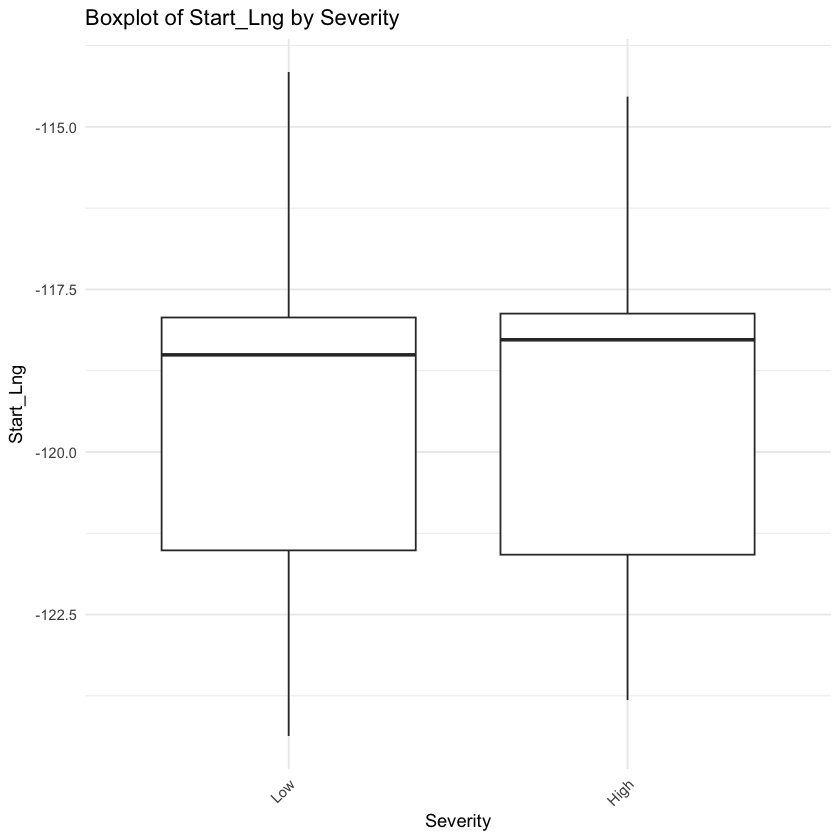

Warning message:
“Removed 41490 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


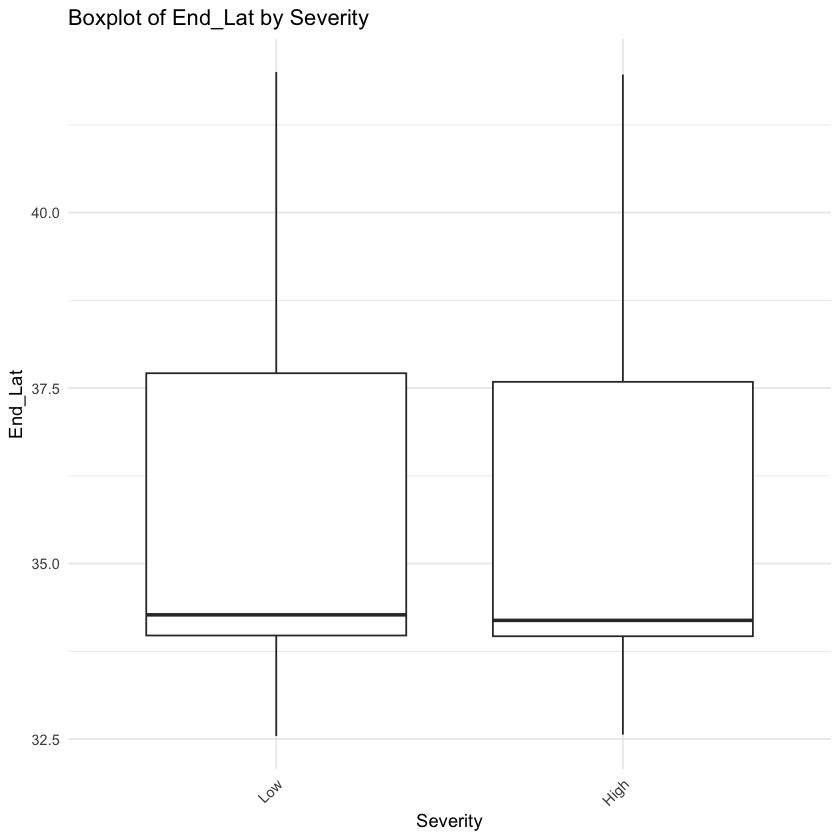

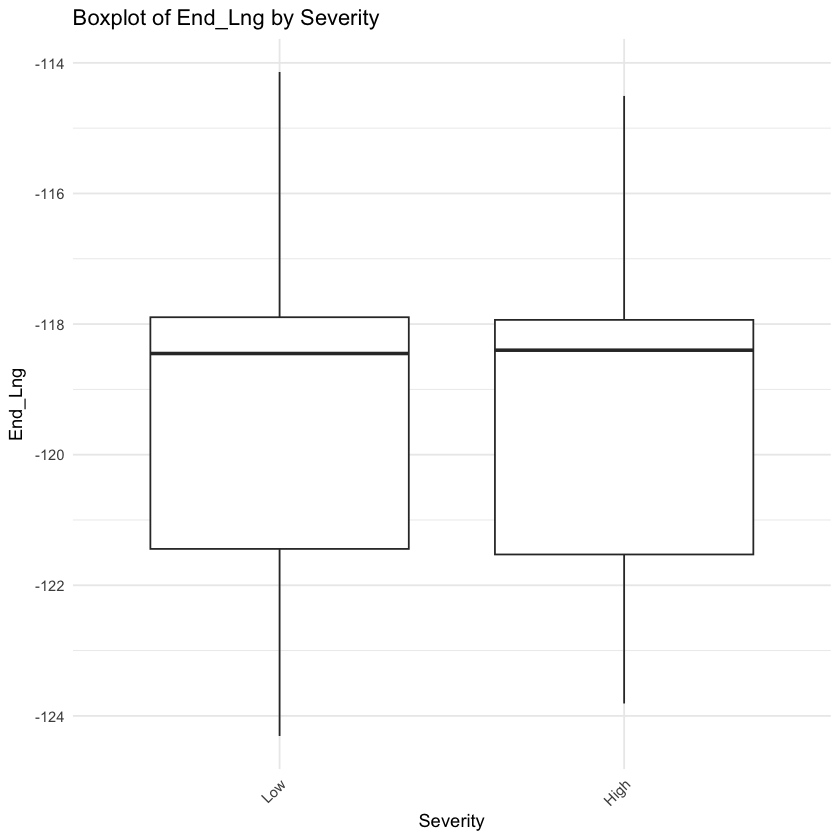

Warning message:
“Removed 2892 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


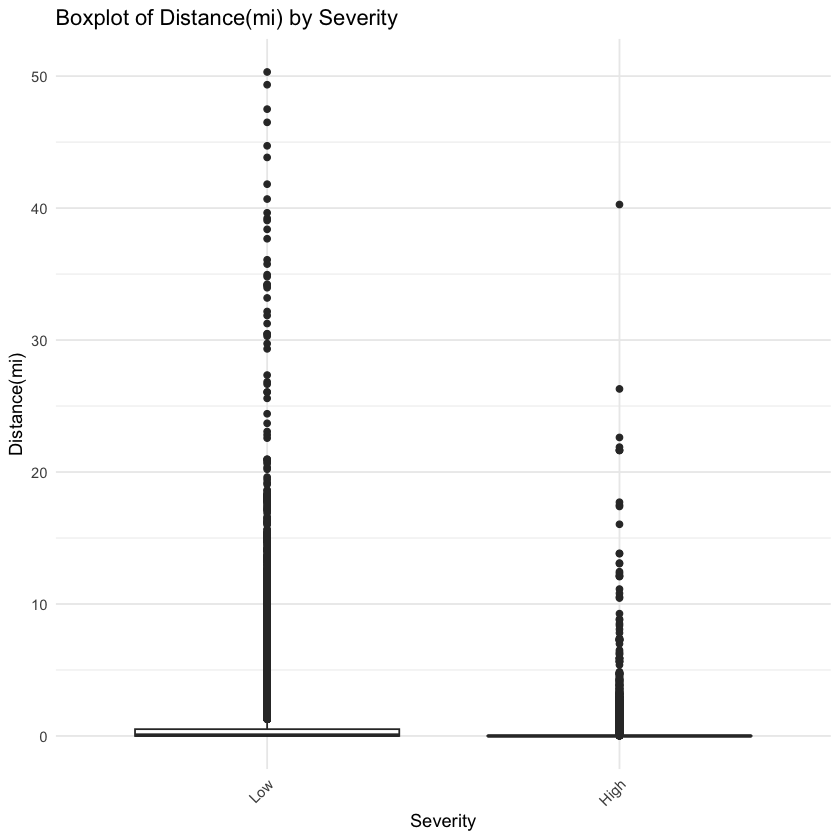

Warning message:
“Removed 32964 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


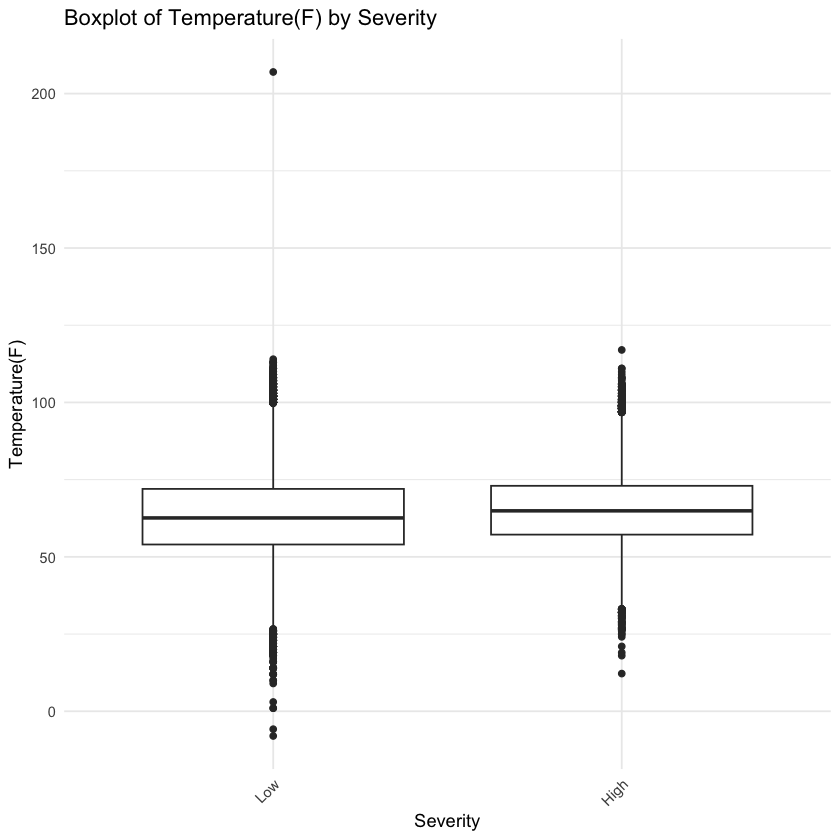

Warning message:
“Removed 3054 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


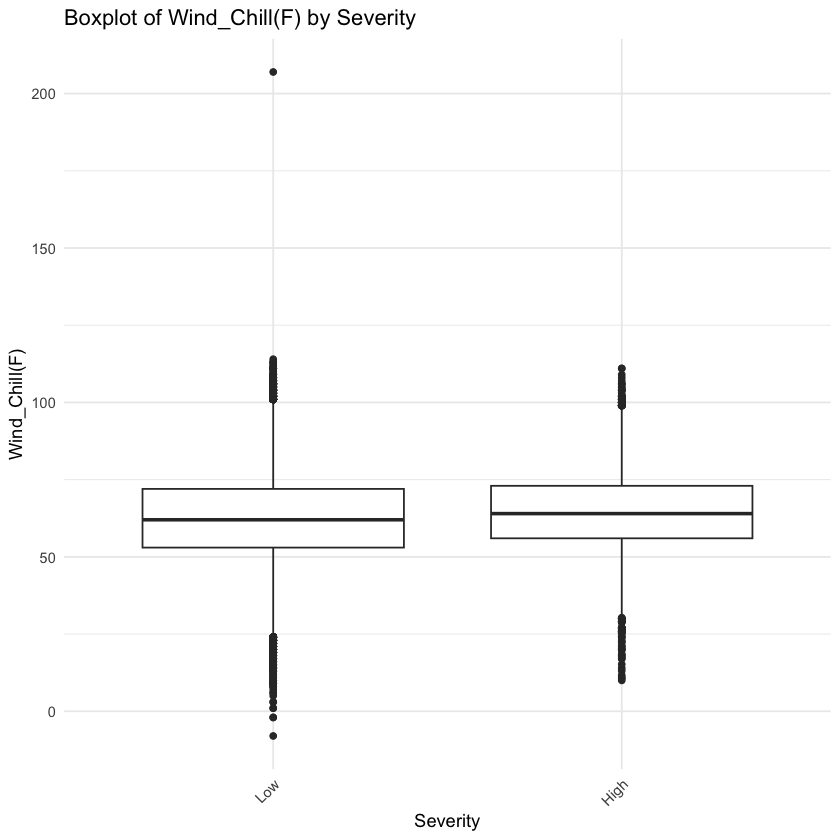

Warning message:
“Removed 2305 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


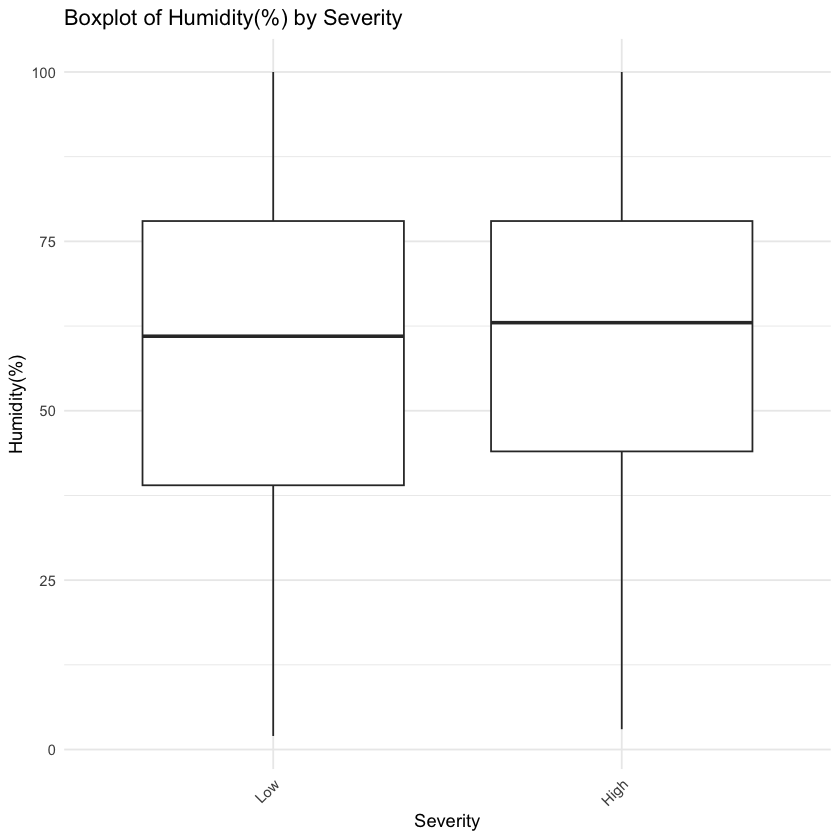

Warning message:
“Removed 2531 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


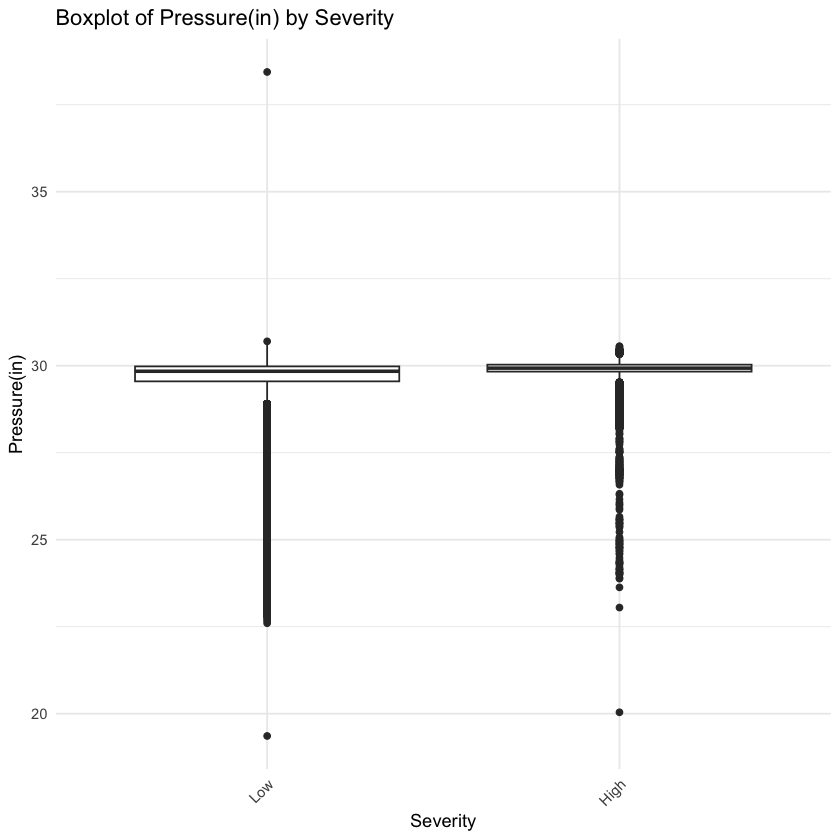

Warning message:
“Removed 10505 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


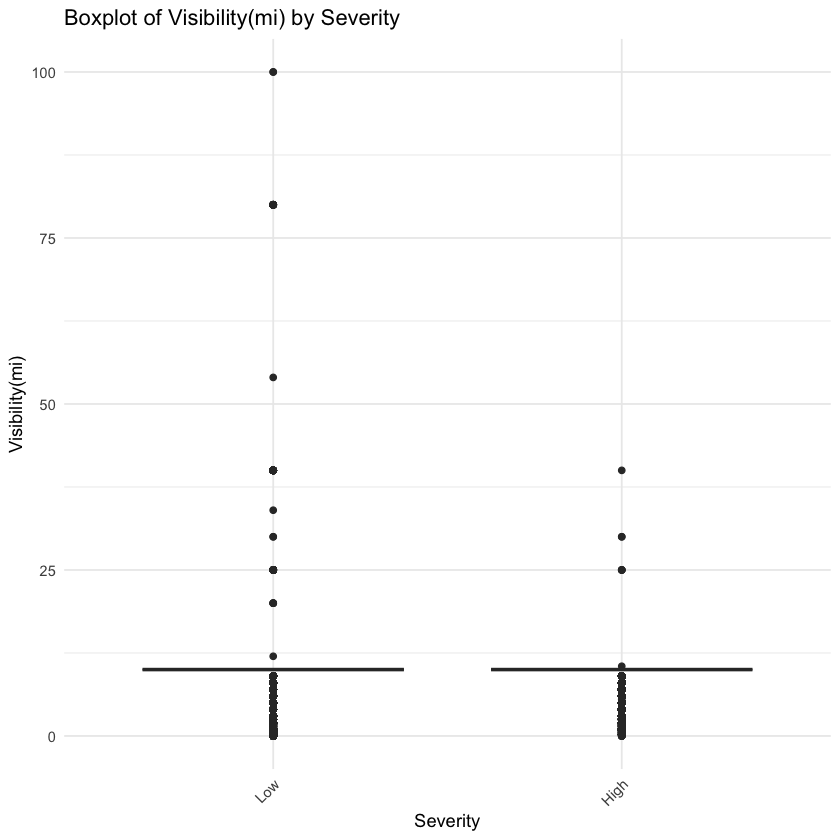

Warning message:
“Removed 36561 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


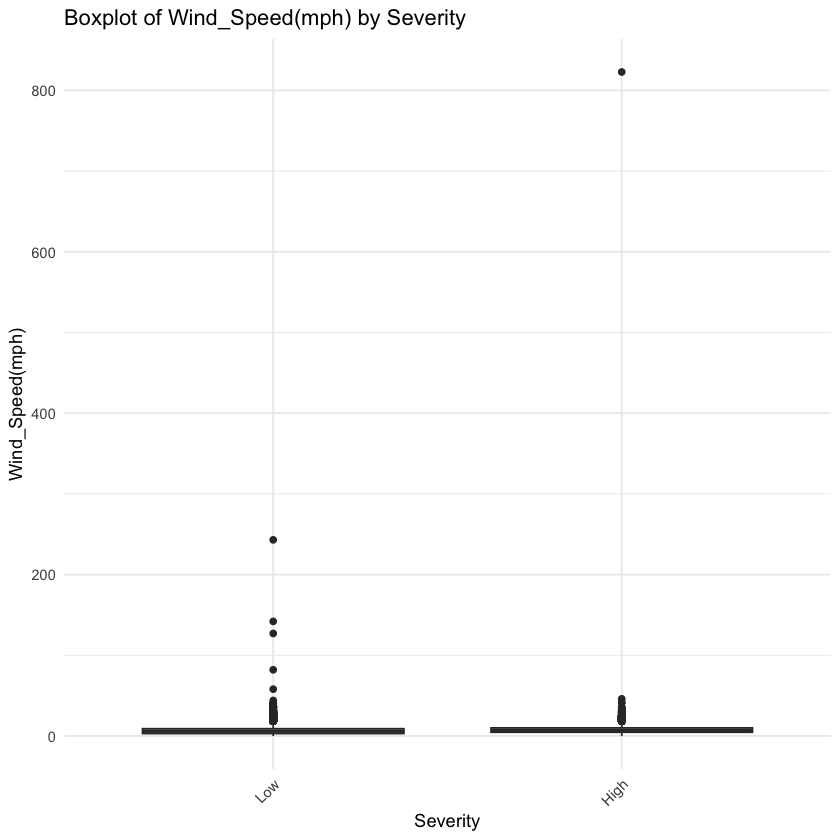

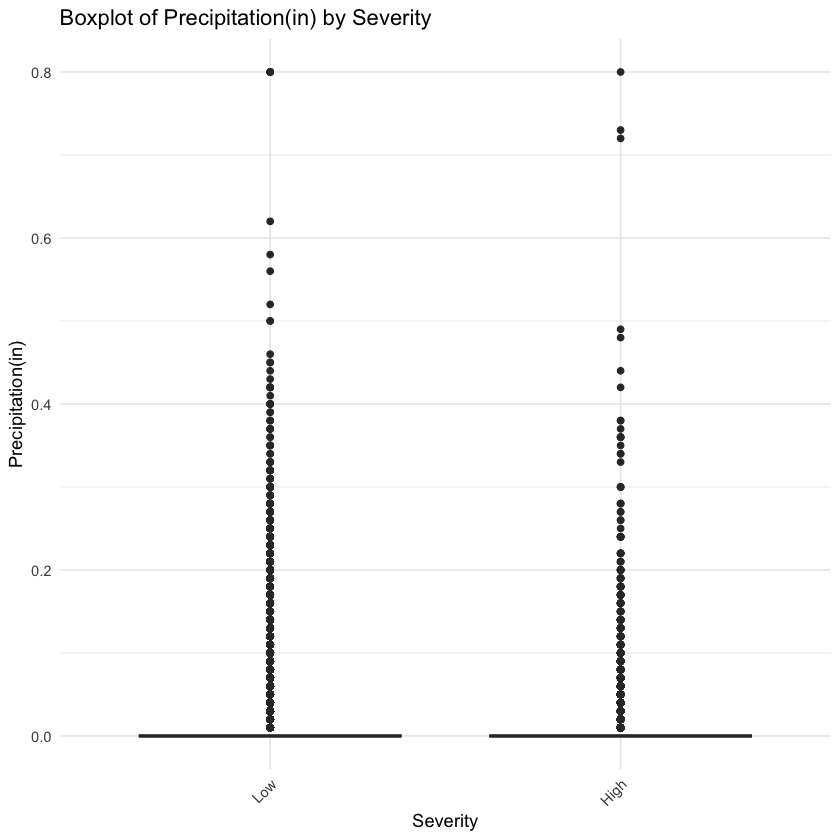

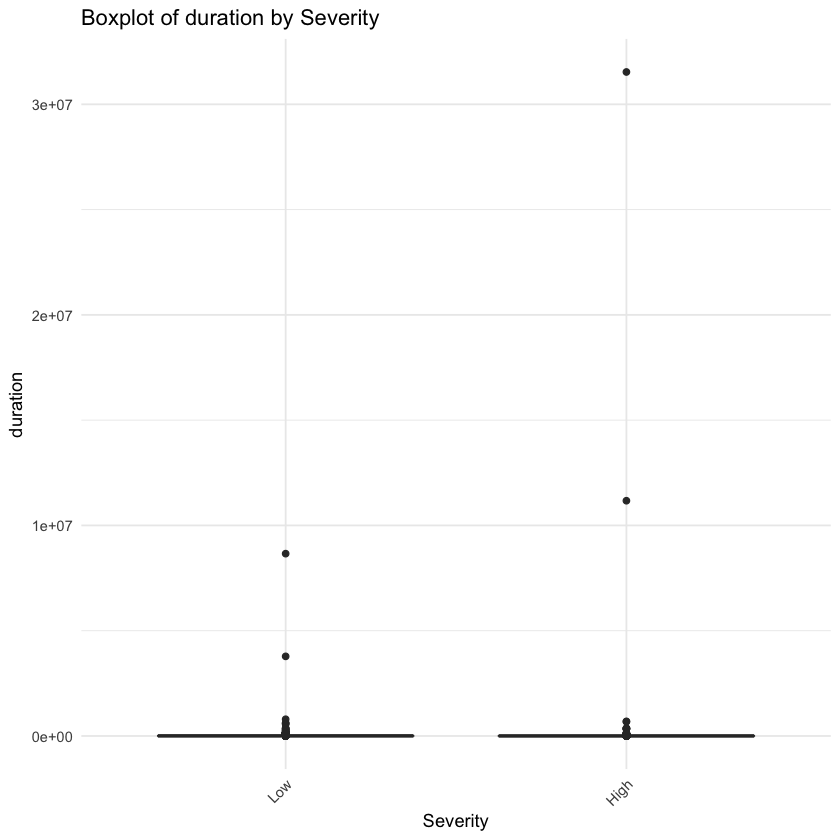

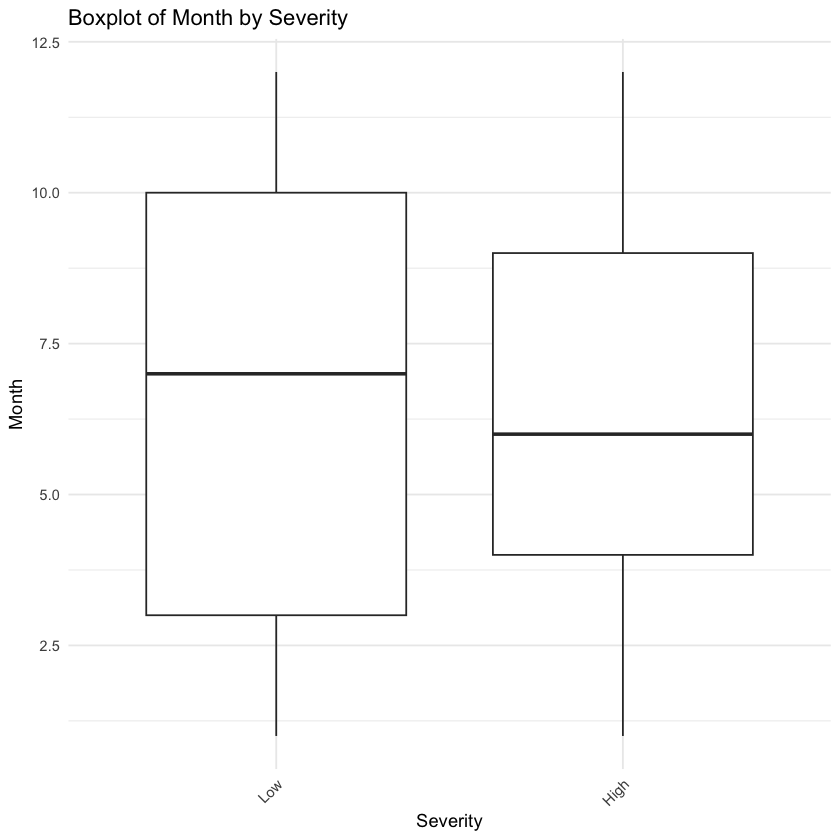

In [242]:
for (var in num_vars) {
  p <- ggplot(california_data, aes(x = Severe, y = .data[[var]])) +
    geom_boxplot() +
    labs(
      title = paste("Boxplot of", var, "by Severity"),
      x = "Severity",
      y = var
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  print(p)
}

## No plot for categorical variable yet, but let's assume all of them not useful

In [243]:
# we see that wind chill start_lat and start_lng could be a good confounding variable because the median different (just use same reasoning as the final report example hh)
model_adj <- glm(
  Severe ~ `Humidity(%)` + `Temperature(F)` + `Wind_Chill(F)` + Start_Lat + Start_Lng,
  data = california_data,
  family = binomial
)

summary(model_adj)


Call:
glm(formula = Severe ~ `Humidity(%)` + `Temperature(F)` + `Wind_Chill(F)` + 
    Start_Lat + Start_Lng, family = binomial, data = california_data)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -27.499006   1.827480 -15.047  < 2e-16 ***
`Humidity(%)`      0.007367   0.000738   9.982  < 2e-16 ***
`Temperature(F)`   0.106700   0.012066   8.843  < 2e-16 ***
`Wind_Chill(F)`   -0.087784   0.011565  -7.590 3.19e-14 ***
Start_Lat         -0.378304   0.020237 -18.694  < 2e-16 ***
Start_Lng         -0.308746   0.020861 -14.800  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 46215  on 80214  degrees of freedom
Residual deviance: 45438  on 80209  degrees of freedom
  (33059 observations deleted due to missingness)
AIC: 45450

Number of Fisher Scoring iterations: 5


In [244]:
# turns out the best model is all variables without any interaction term, we will do model diagnostic now
model_adj <- glm(
  Severe ~ `Humidity(%)` + `Temperature(F)` + `Wind_Chill(F)` + Start_Lat + Start_Lng,
  data = california_data,
  family = binomial
)

summary(model_adj)


Call:
glm(formula = Severe ~ `Humidity(%)` + `Temperature(F)` + `Wind_Chill(F)` + 
    Start_Lat + Start_Lng, family = binomial, data = california_data)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -27.499006   1.827480 -15.047  < 2e-16 ***
`Humidity(%)`      0.007367   0.000738   9.982  < 2e-16 ***
`Temperature(F)`   0.106700   0.012066   8.843  < 2e-16 ***
`Wind_Chill(F)`   -0.087784   0.011565  -7.590 3.19e-14 ***
Start_Lat         -0.378304   0.020237 -18.694  < 2e-16 ***
Start_Lng         -0.308746   0.020861 -14.800  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 46215  on 80214  degrees of freedom
Residual deviance: 45438  on 80209  degrees of freedom
  (33059 observations deleted due to missingness)
AIC: 45450

Number of Fisher Scoring iterations: 5


In [245]:
# Check for missing values
#missing_values <- colSums(is.na(california_data))
#print(missing_values[missing_values > 0])

# Handle missing values (example: drop rows with missing critical variables or impute)
california_data_clean <- na.omit(california_data)
    # Drop rows missing key variables

# Convert date-time columns to appropriate format
california_data_clean$Start_Time <- as.POSIXct(california_data_clean$Start_Time)
california_data_clean$End_Time <- as.POSIXct(california_data_clean$End_Time)

california_data_clean$Severity <- ifelse(california_data_clean$Severity < 3, "Minor", "Severe")

# Convert the resulting column to a factor with two levels: "Minor" and "Severe"
california_data_clean$Severity <- factor(california_data_clean$Severity, levels = c("Minor", "Severe"))
california_data_clean <- california_data_clean |>
  select(
    Temperature = 'Temperature(F)',
    WindChill = 'Wind_Chill(F)',
    Humidity = 'Humidity(%)',
    Latitude = 'Start_Lat',
    Longitude = 'Start_Lng',
    Severity,
    Precipitation = 'Precipitation(in)',
    Month,
    Visibility = 'Visibility(mi)',
    Pressure =  'Pressure(in)',
    WindSpeed = 'Wind_Speed(mph)',
    
    Daylight = 'Sunrise_Sunset',
    TrafficSignal = 'Traffic_Signal',
    Distance = 'Distance(mi)'
  )

california_data_clean$TrafficSignal = as.factor(california_data_clean$TrafficSignal)
california_data_clean$Daylight = as.factor(california_data_clean$Daylight)
str(california_data_clean)


# Check for outliers in Severity using a boxplot
#ggplot(california_data_clean, aes(y = Severity)) +
#  geom_boxplot(fill = "lightblue") +
#  labs(title = "Boxplot of Accident Severity", y = "Severity") +
#  theme_minimal()

tibble [57,341 × 14] (S3: tbl_df/tbl/data.frame)
 $ Temperature  : num [1:57341] 68 42 63 55 37 60 49 50 75 54 ...
 $ WindChill    : num [1:57341] 68 42 63 55 37 60 45 50 75 54 ...
 $ Humidity     : num [1:57341] 73 34 40 72 93 80 50 89 57 72 ...
 $ Latitude     : num [1:57341] 34.7 35.4 32.8 33.1 38.1 ...
 $ Longitude    : num [1:57341] -120 -119 -117 -117 -122 ...
 $ Severity     : Factor w/ 2 levels "Minor","Severe": 1 1 1 1 1 1 1 1 1 1 ...
 $ Precipitation: num [1:57341] 0 0 0 0 0 0 0 0 0 0 ...
 $ Month        : num [1:57341] 8 12 2 3 1 12 6 12 5 1 ...
 $ Visibility   : num [1:57341] 10 10 10 10 0.5 10 10 6 10 10 ...
 $ Pressure     : num [1:57341] 29.8 29.8 29.7 29.7 30.2 ...
 $ WindSpeed    : num [1:57341] 13 0 14 6 0 7 10 3 12 0 ...
 $ Daylight     : Factor w/ 2 levels "Day","Night": 1 2 1 1 2 1 1 2 1 1 ...
 $ TrafficSignal: Factor w/ 2 levels "FALSE","TRUE": 2 1 1 1 1 1 1 1 1 1 ...
 $ Distance     : num [1:57341] 0.022 0.046 2.845 1.626 0.14 ...
 - attr(*, "na.action")= 'omit' 

In [246]:
summary(california_data_clean)


  Temperature    WindChill         Humidity         Latitude    
 Min.   : -8   Min.   : -8.00   Min.   :  2.00   Min.   :32.56  
 1st Qu.: 53   1st Qu.: 53.00   1st Qu.: 38.00   1st Qu.:33.97  
 Median : 62   Median : 62.00   Median : 60.00   Median :34.27  
 Mean   : 63   Mean   : 62.69   Mean   : 57.87   Mean   :35.66  
 3rd Qu.: 72   3rd Qu.: 72.00   3rd Qu.: 78.00   3rd Qu.:37.72  
 Max.   :114   Max.   :114.00   Max.   :100.00   Max.   :42.00  
   Longitude        Severity     Precipitation          Month       
 Min.   :-124.3   Minor :56512   Min.   :0.000000   Min.   : 1.000  
 1st Qu.:-121.4   Severe:  829   1st Qu.:0.000000   1st Qu.: 3.000  
 Median :-118.5                  Median :0.000000   Median : 7.000  
 Mean   :-119.5                  Mean   :0.003356   Mean   : 6.641  
 3rd Qu.:-117.9                  3rd Qu.:0.000000   3rd Qu.:10.000  
 Max.   :-114.3                  Max.   :0.800000   Max.   :12.000  
   Visibility         Pressure       WindSpeed        Daylight

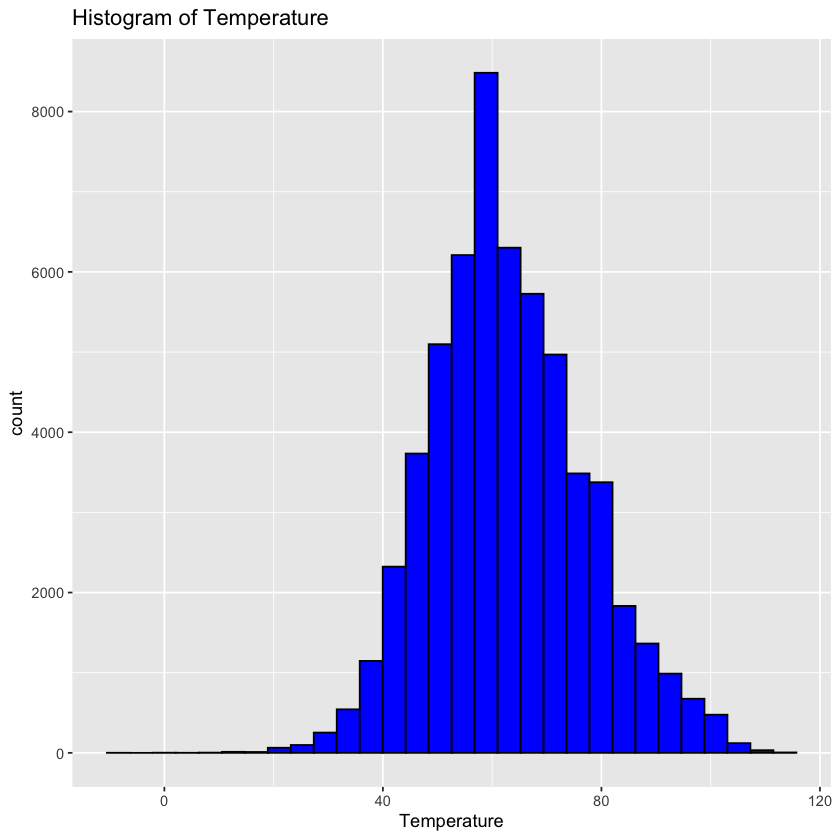

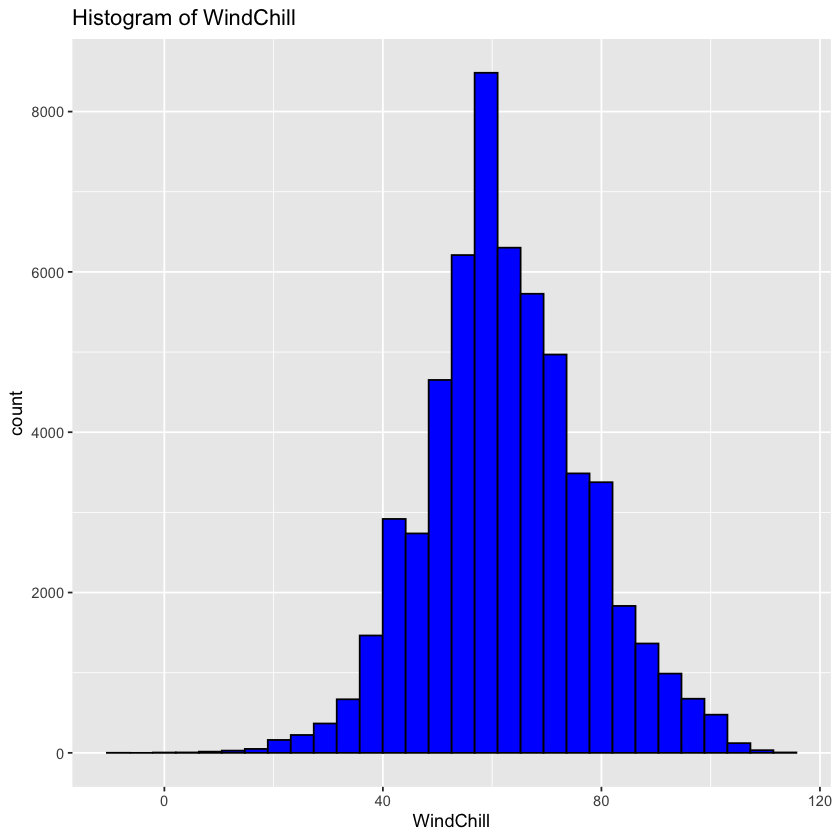

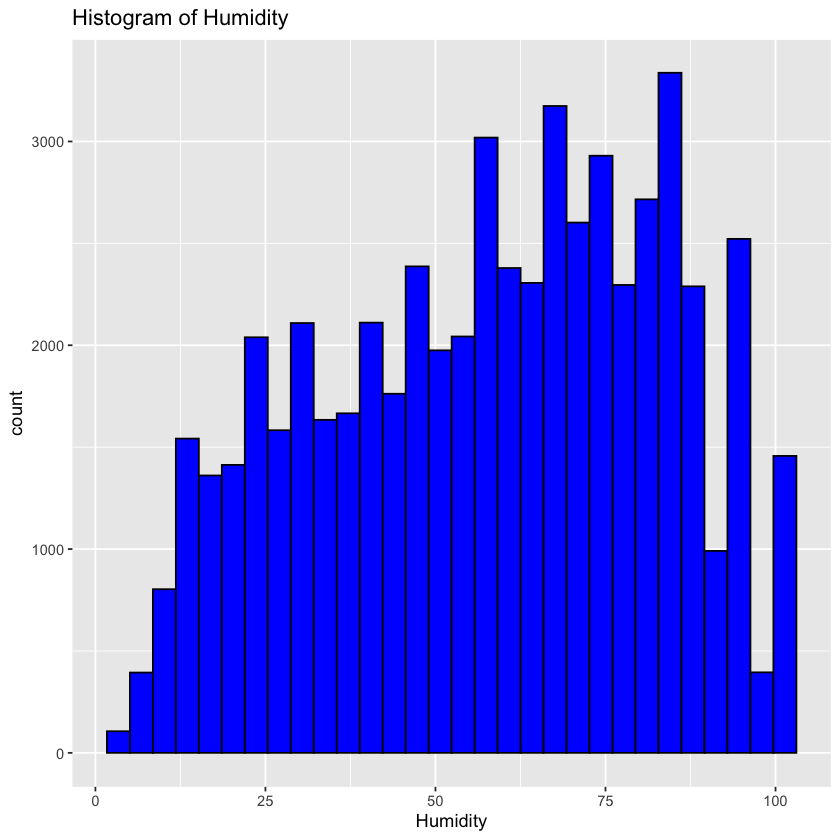

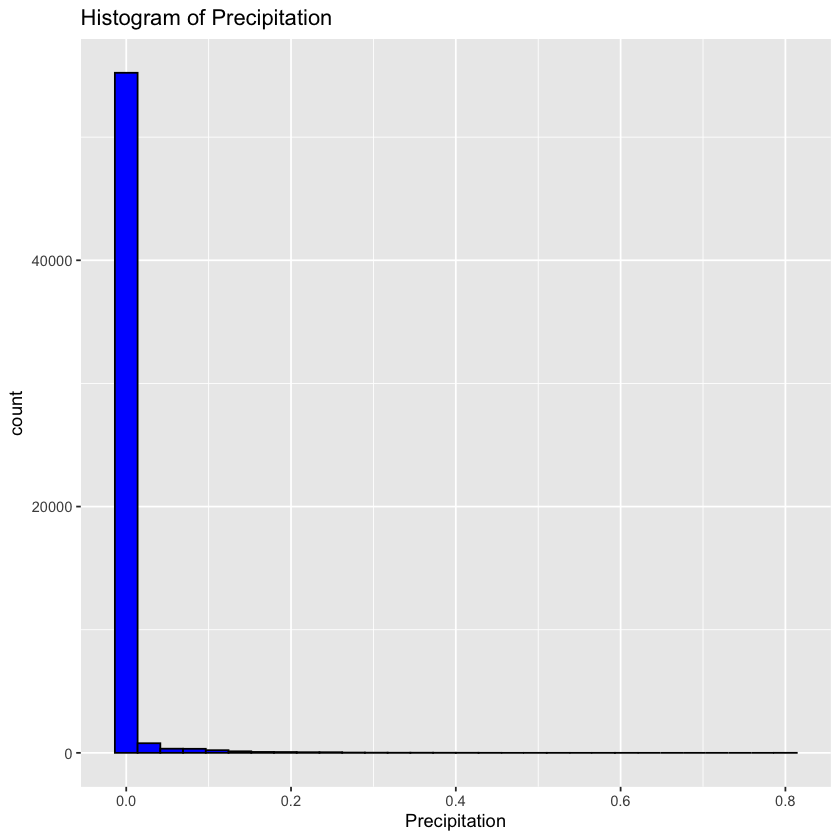

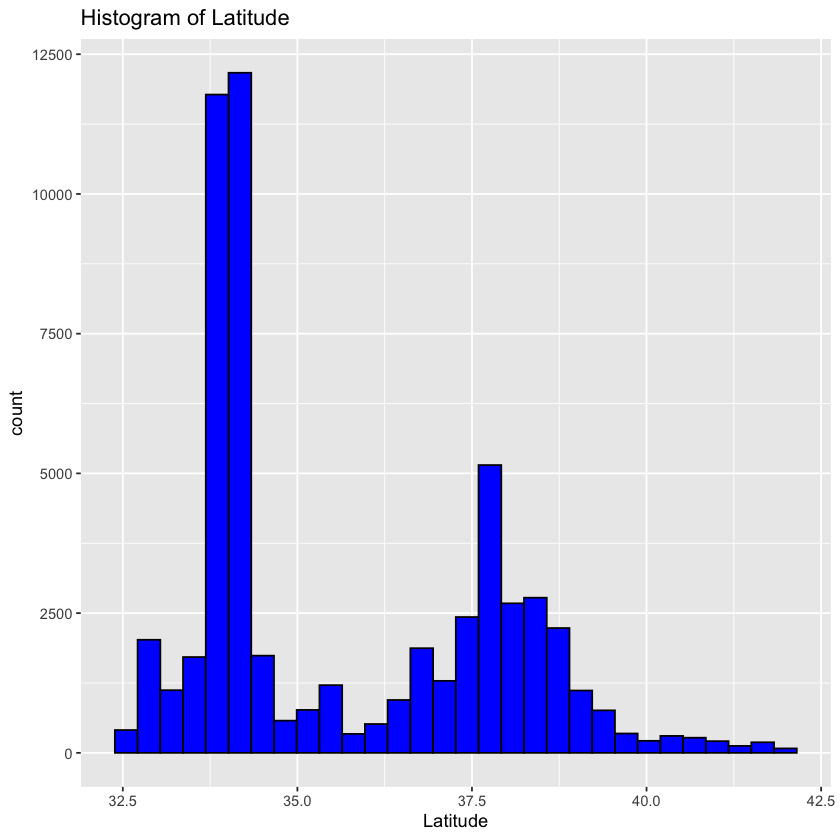

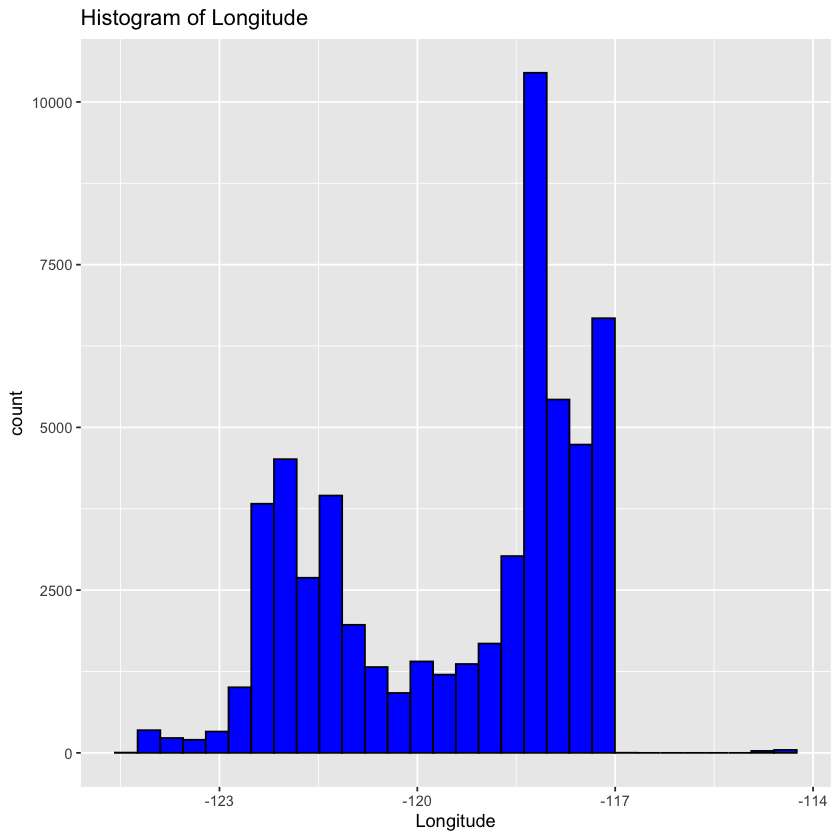

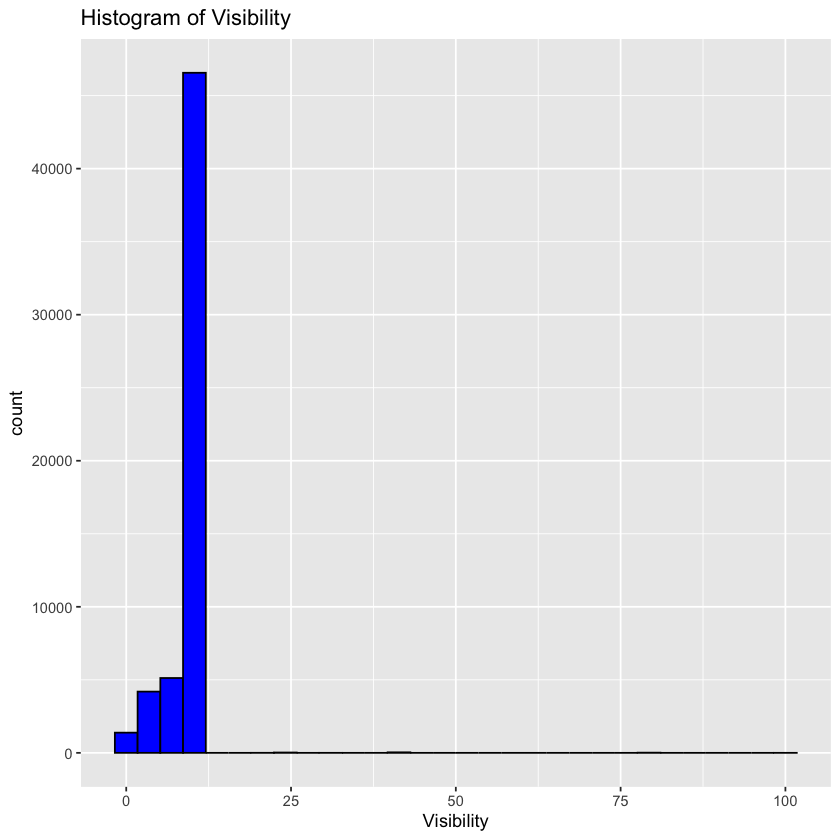

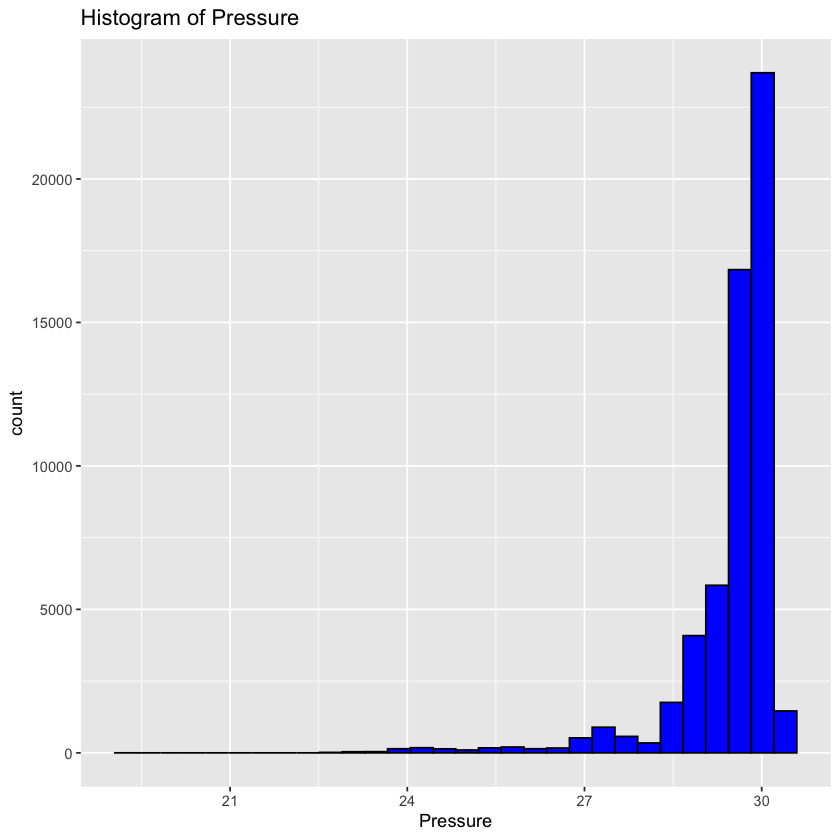

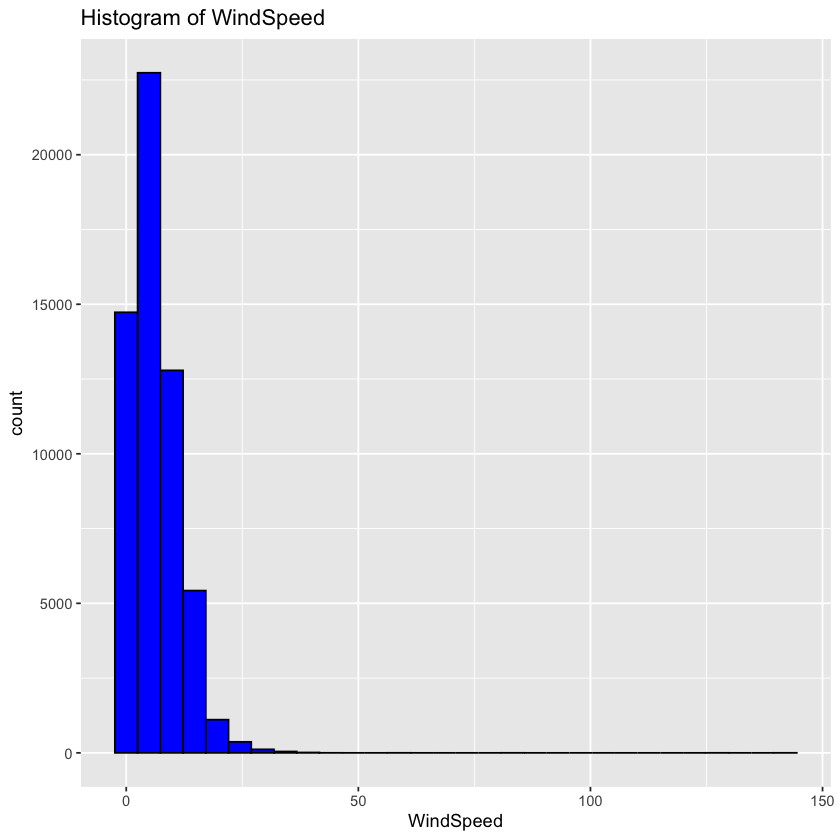

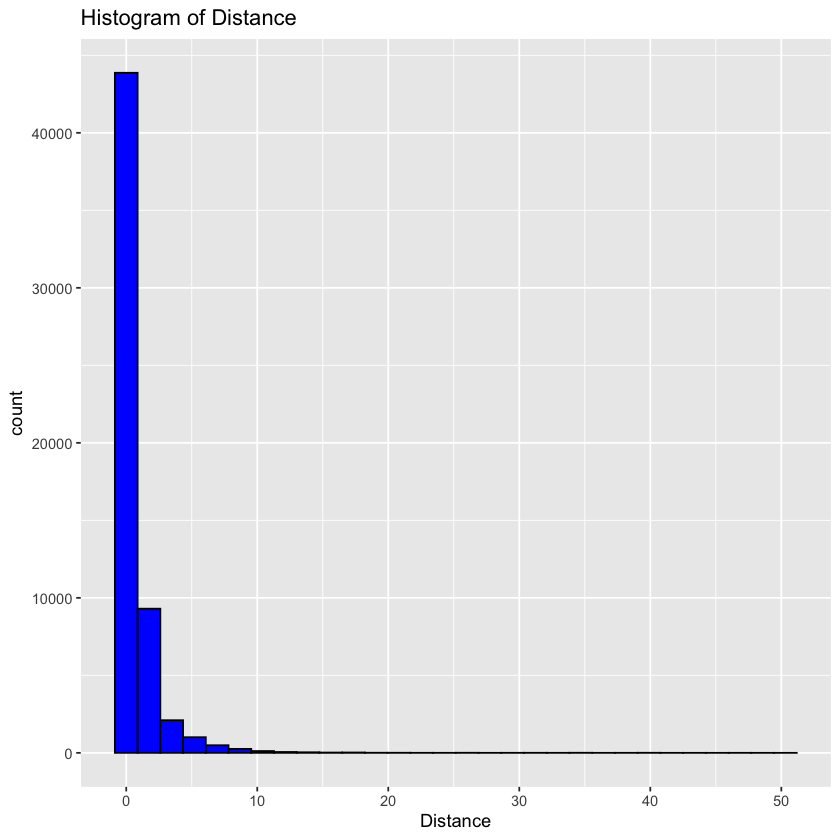

In [247]:
num_vars <- c(
  "Temperature",
  "WindChill",
  "Humidity",
  "Precipitation",
  "Latitude",
  "Longitude",
  "Visibility",
  "Pressure",
  "WindSpeed",
  "Distance"
)

for (var in num_vars) {
  p <- ggplot(california_data_clean, aes_string(x = var)) +
    geom_histogram(bins = 30, fill = "blue", color = "black") +
    ggtitle(paste("Histogram of", var))
  print(p)
}

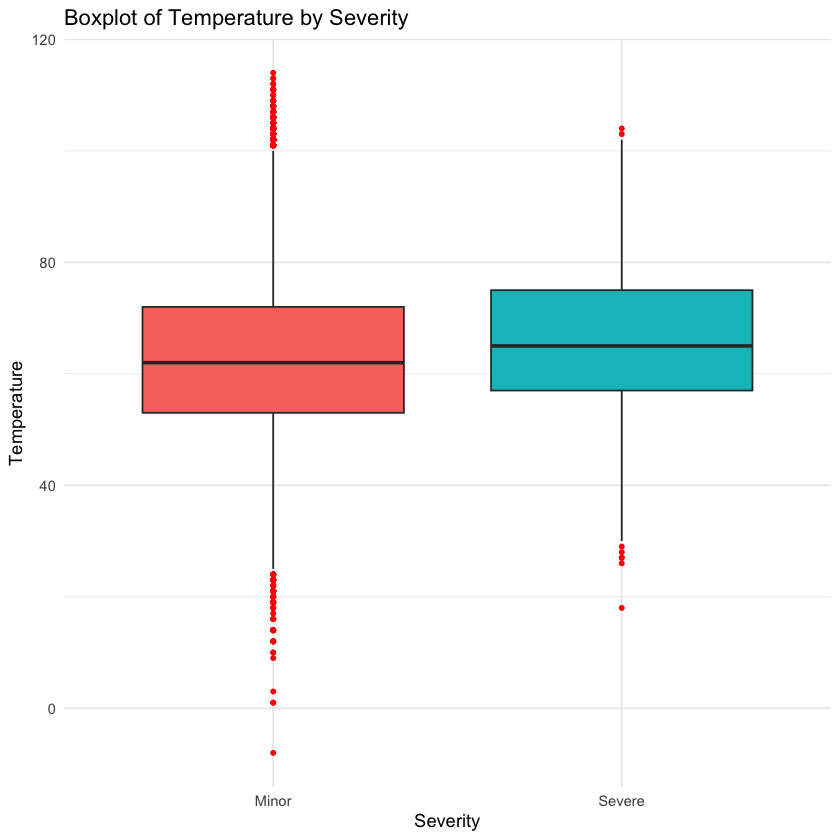

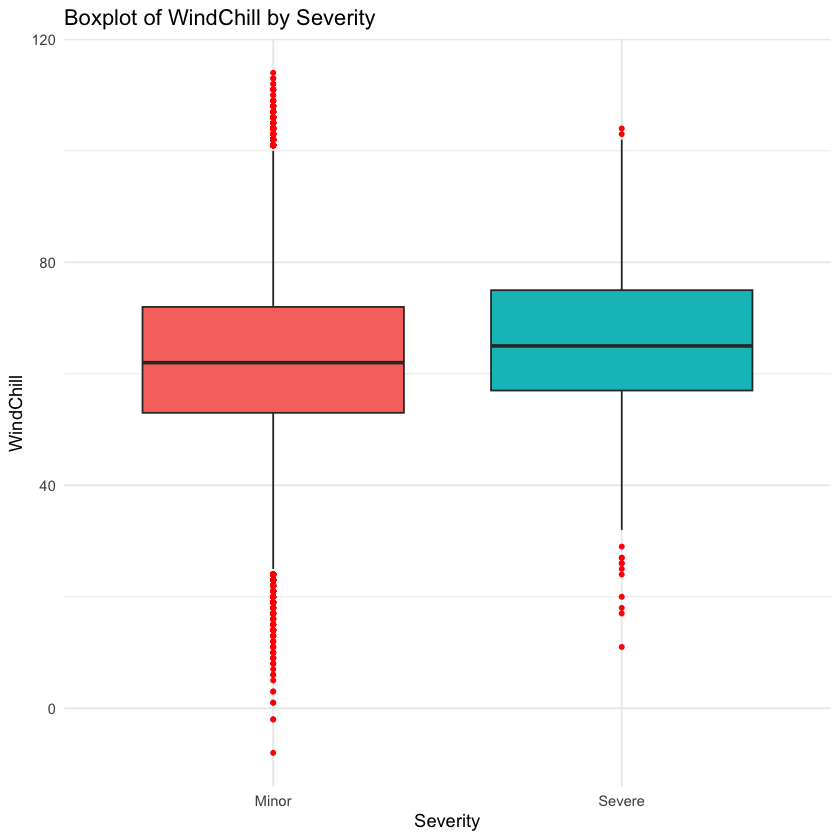

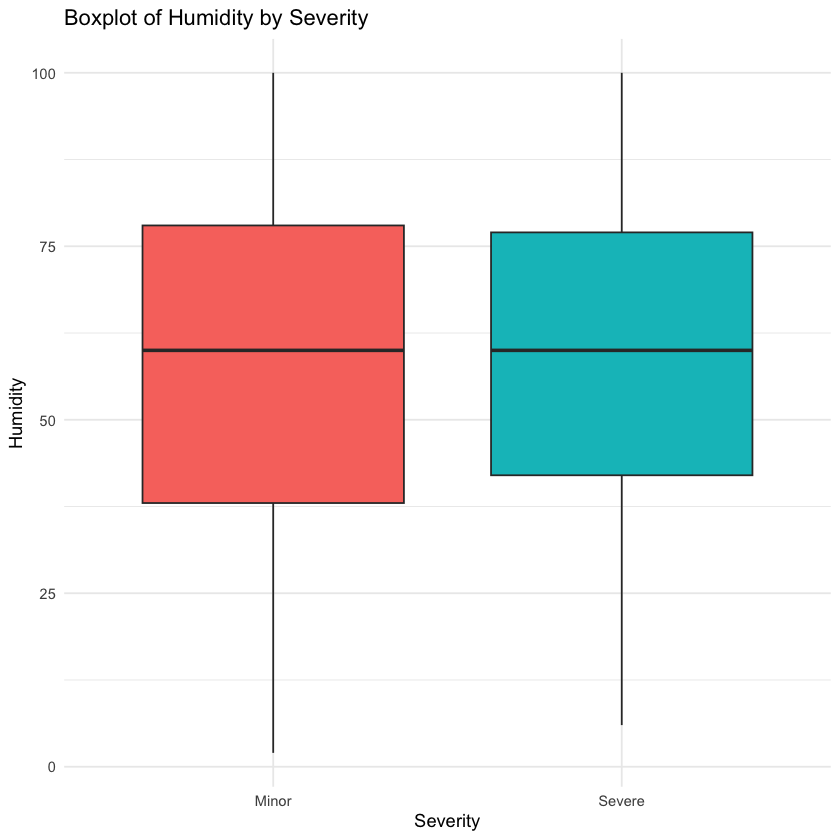

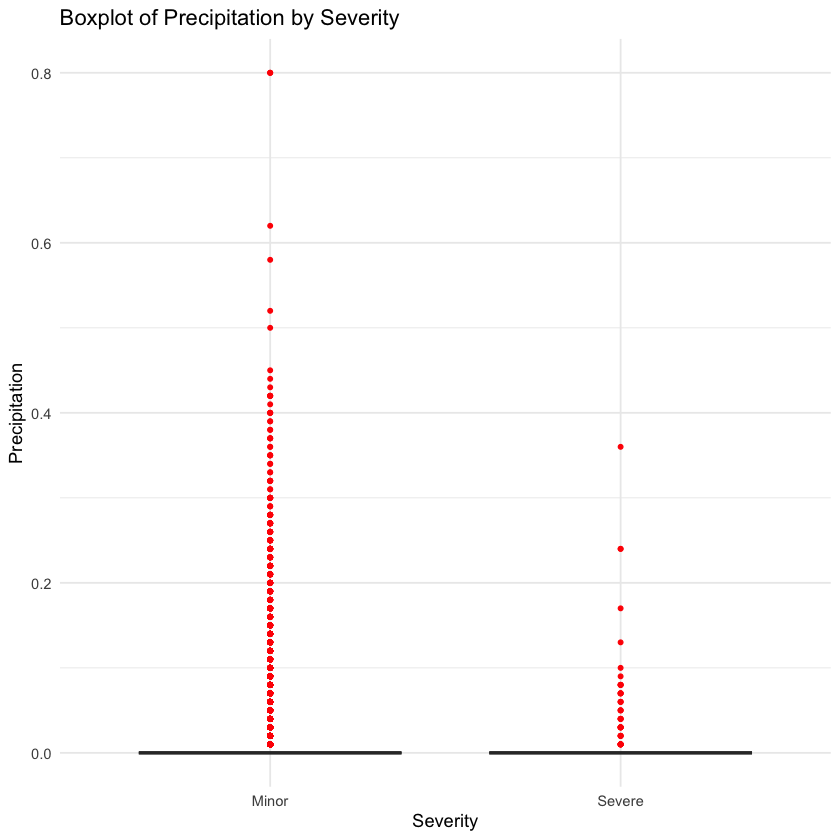

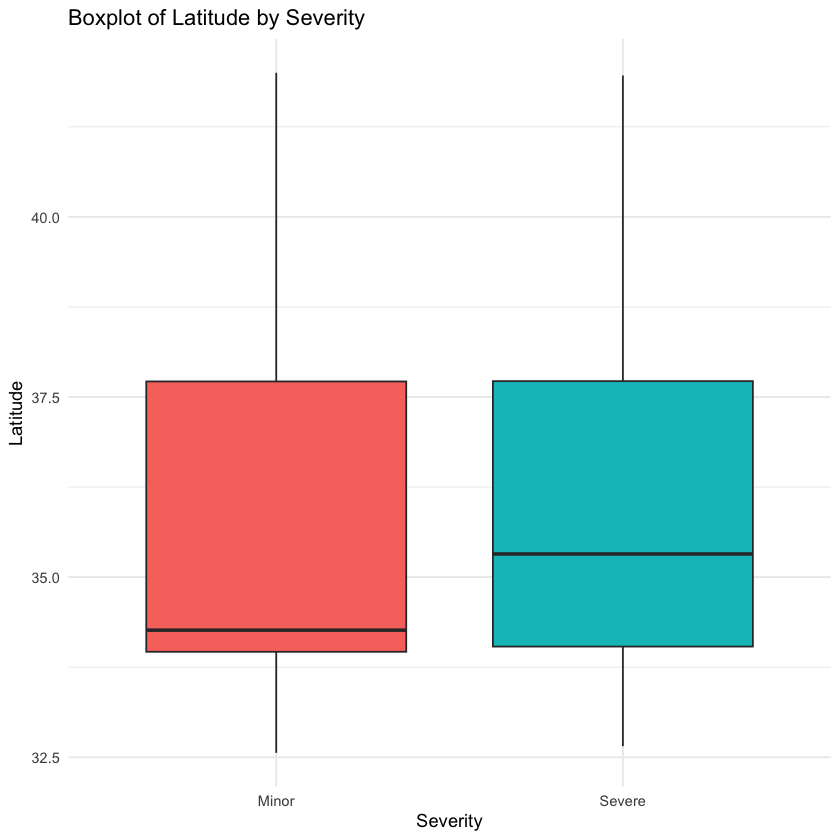

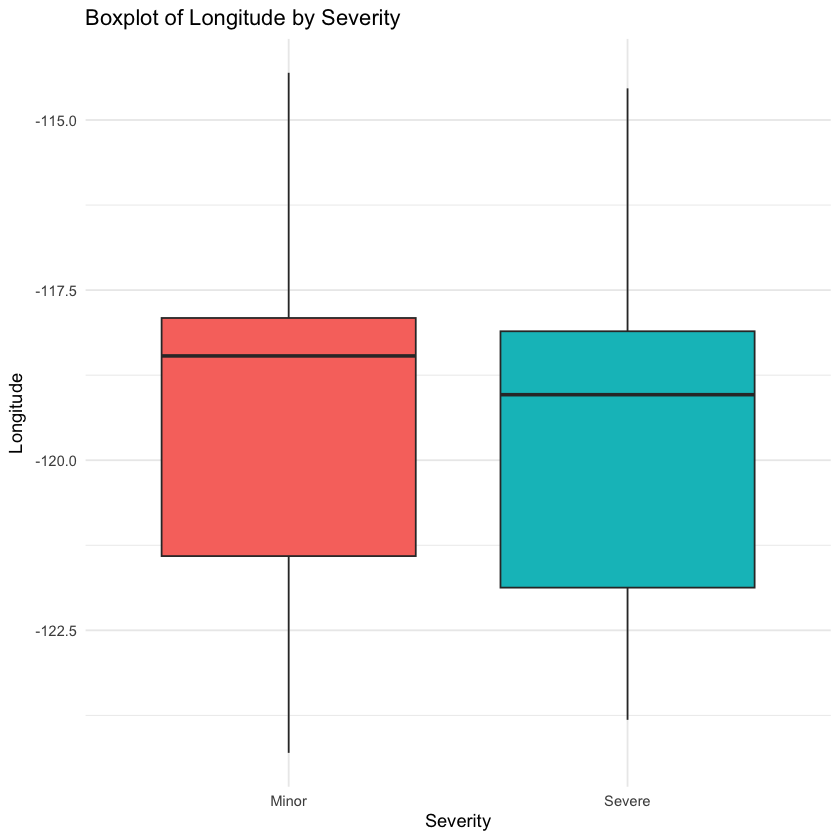

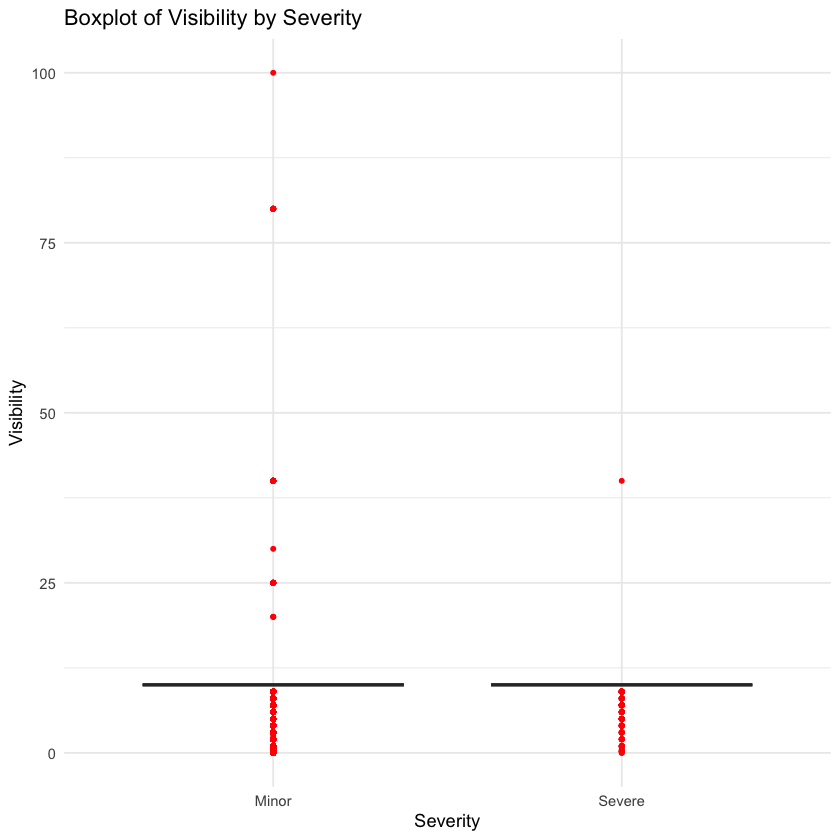

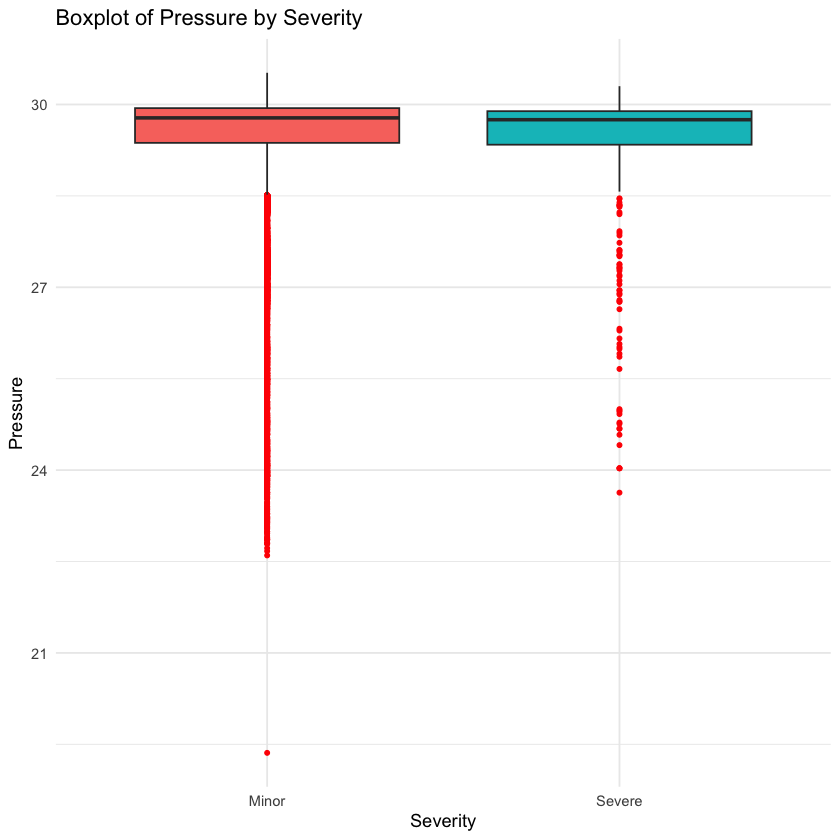

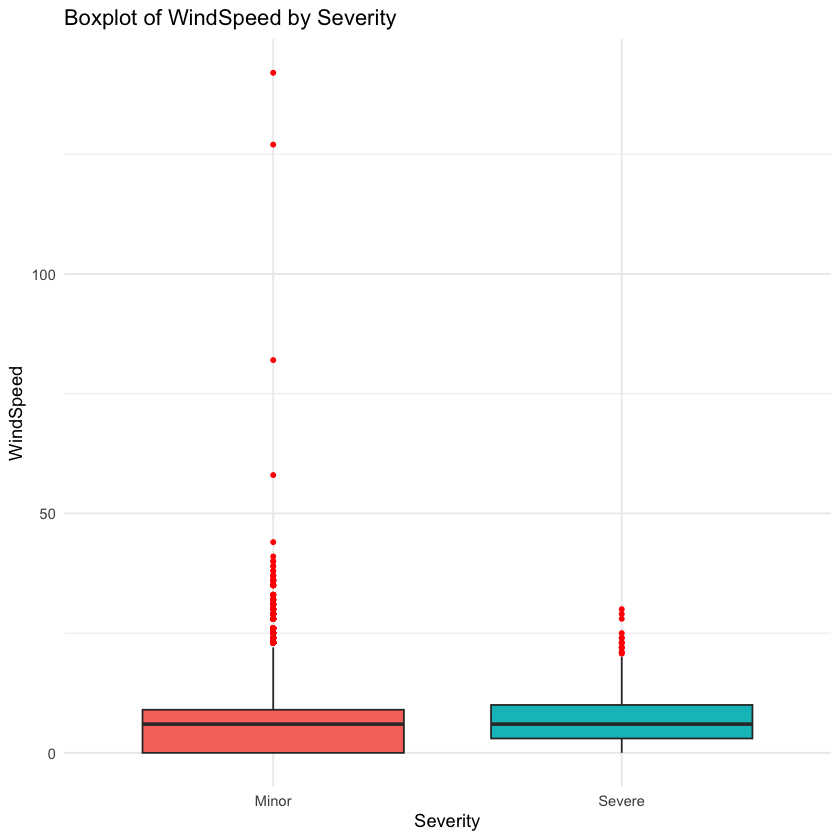

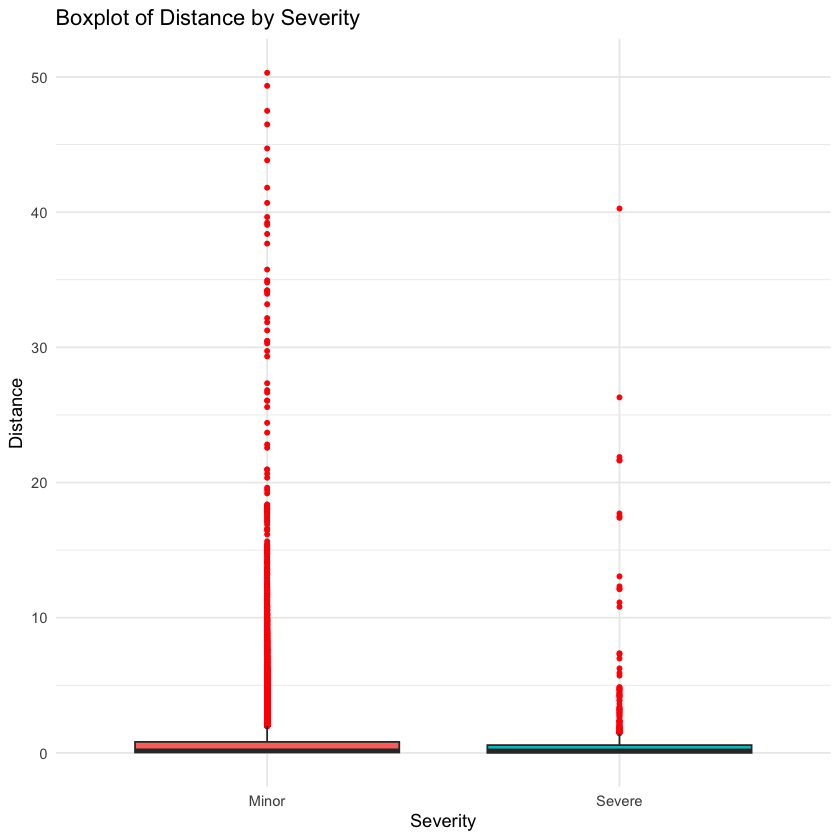

In [248]:
numeric_vars <- c(
  "Temperature",
  "WindChill",
  "Humidity",
  "Precipitation",
  "Latitude",
  "Longitude",
  "Visibility",
  "Pressure",
  "WindSpeed",
  "Distance"
)

# Loop through and create boxplots
for (var in numeric_vars) {
  p <- ggplot(california_data_clean, aes(x = Severity, y = .data[[var]], fill = Severity)) +
    geom_boxplot(outlier.color = "red", outlier.size = 1) +
    labs(title = paste("Boxplot of", var, "by Severity"),
         y = var,
         x = "Severity") +
    theme_minimal() +
    theme(legend.position = "none")
  
  print(p)
}

# Histogram for Severity
#ggplot(california_data_clean, aes(x = Severity)) +
#  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
#  labs(title = "Distribution of Accident Severity", x = "Severity", y = "Frequency") +
 # theme_minimal()

# Bar plot for top 10 cities with most accidents
#top_cities <- california_data_clean %>% 
#  count(City, name = "Accidents") %>% 
#  top_n(10, Accidents)
#ggplot(top_cities, aes(x = reorder(City, Accidents), y = Accidents)) +
#  geom_bar(stat = "identity", fill = "green") +
#  coord_flip() +
#  labs(title = "Top 10 Cities with Most Accidents", x = "City", y = "Number of Accidents") +
#  theme_minimal()

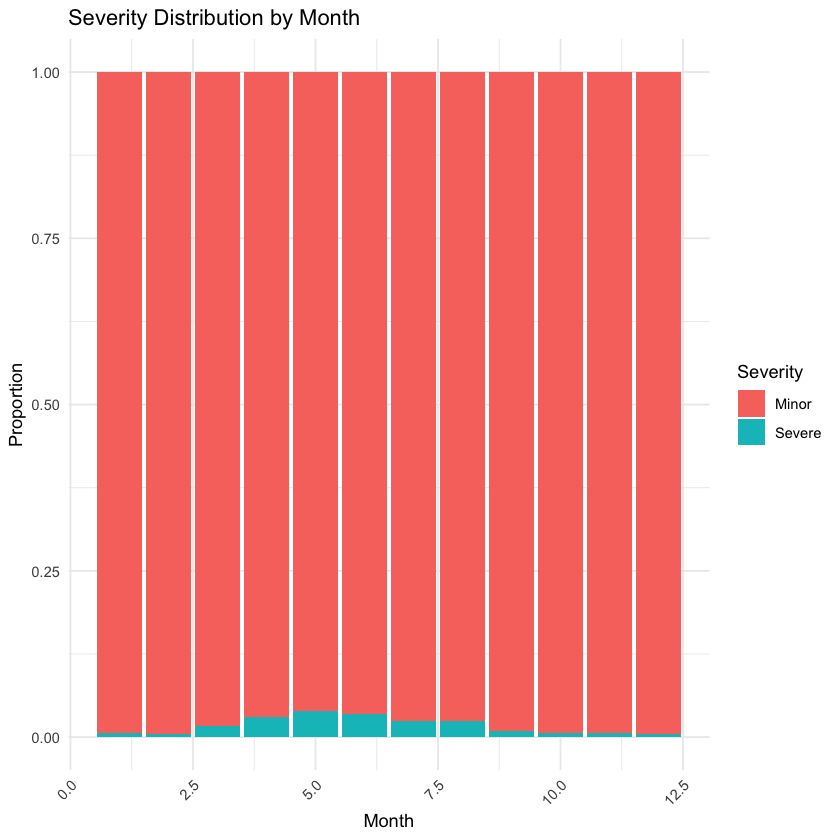

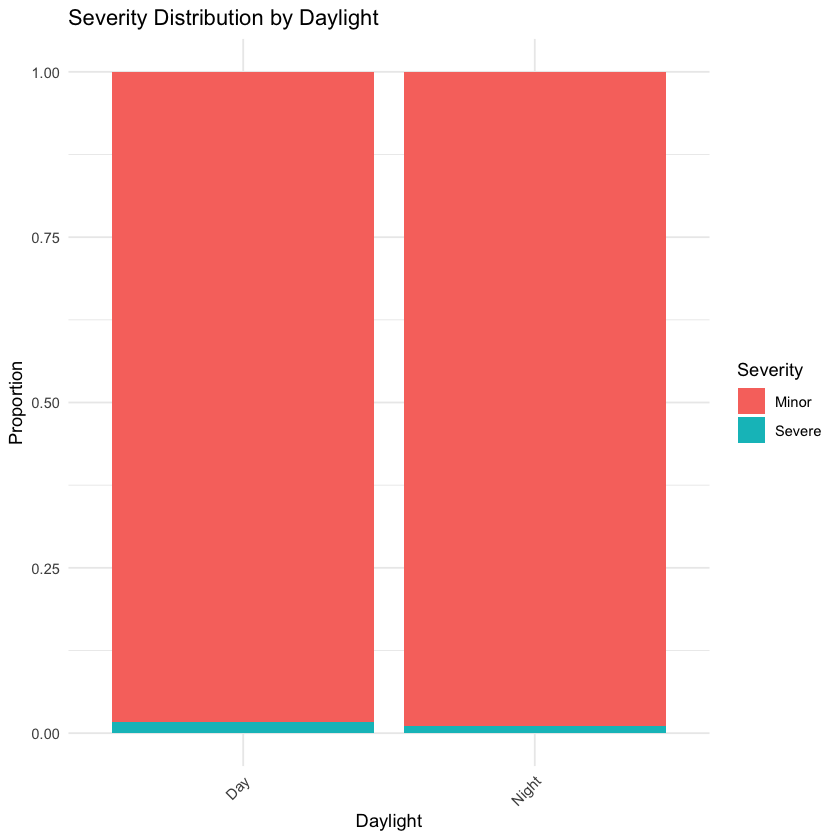

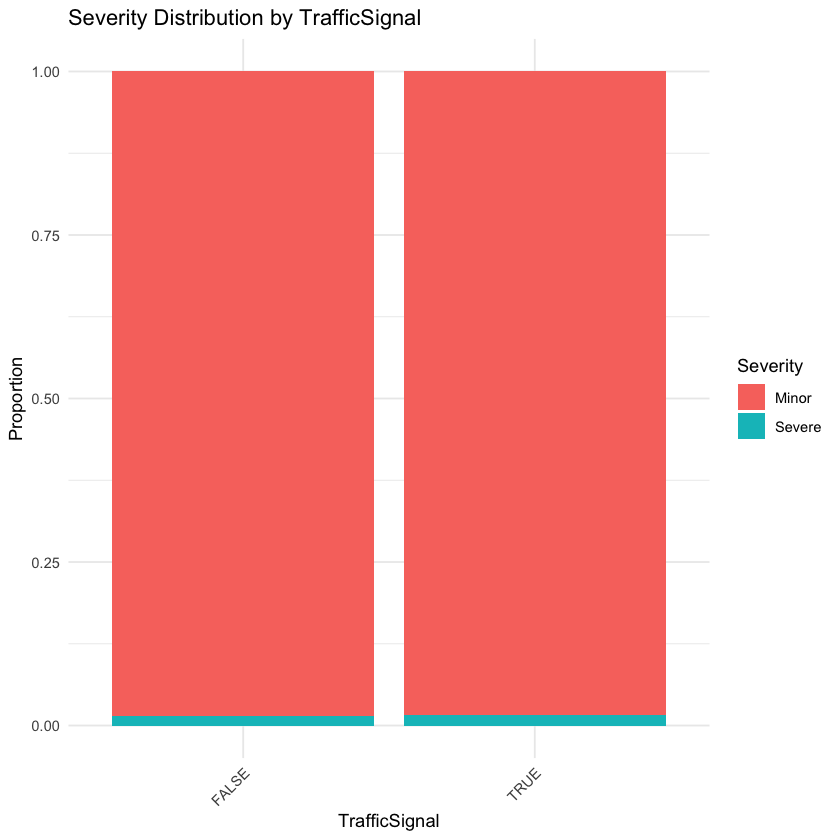

In [249]:
cat_vars <- c( "Month", "Daylight", "TrafficSignal")
for (var in cat_vars) {
  p <- ggplot(california_data_clean, aes_string(x = var, fill = "Severity")) +
    geom_bar(position = "fill") +  # stacked bar with proportions
    labs(title = paste("Severity Distribution by", var),
         y = "Proportion",
         x = var,
         fill = "Severity") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  print(p)
}

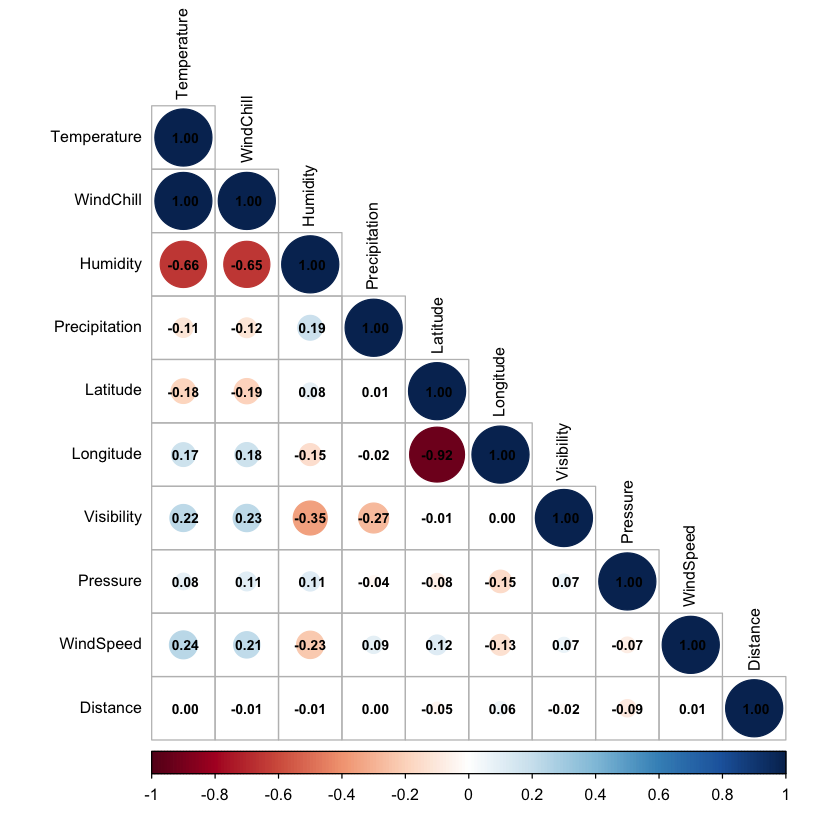

In [250]:
numeric_data <- california_data_clean[, num_vars]

# Compute correlation matrix (excluding NAs)
cor_matrix <- cor(numeric_data, use = "complete.obs")

# Plot the correlation matrix
corrplot(cor_matrix,
         method = "circle",    
         type = "lower",        
         tl.col = "black",    
         tl.cex = 0.8,         
         number.cex = 0.7,      
         addCoef.col = "black")

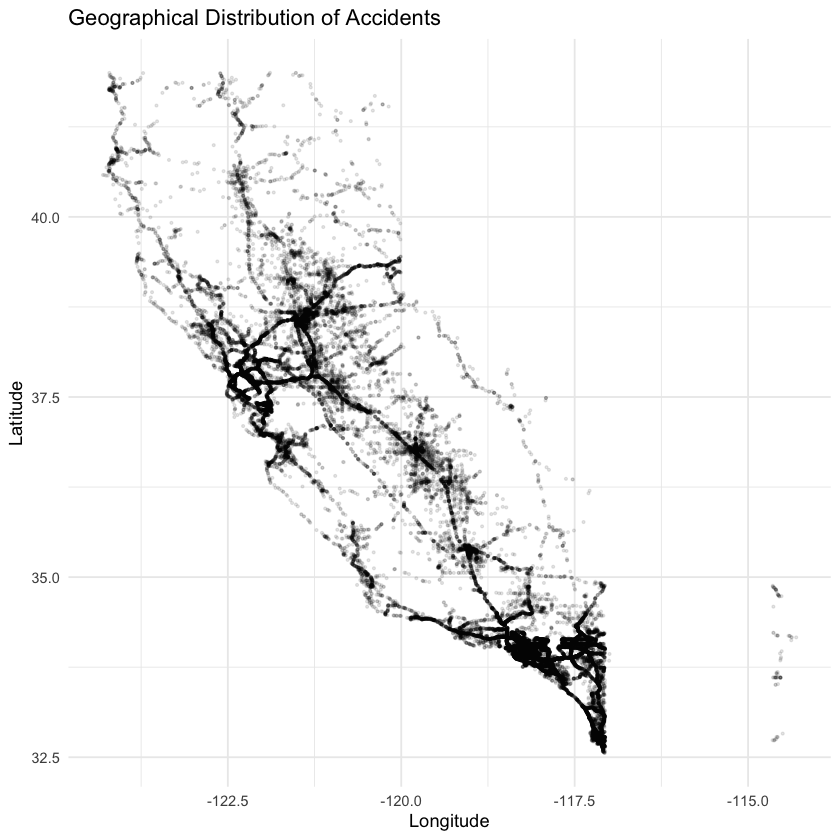

In [251]:
# Scatter plot of accident locations
ggplot(california_data_clean, aes(x = Longitude, y = Latitude)) +
  geom_point(alpha = 0.1, size = 0.5) +
  labs(title = "Geographical Distribution of Accidents", x = "Longitude", y = "Latitude") +
  theme_minimal()

In [252]:
# Interaction plot: Severity by Weather Condition and Time of Day
model= glm(Severity~., data=california_data_clean, family=binomial)
summary(model)


Call:
glm(formula = Severity ~ ., family = binomial, data = california_data_clean)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.771e+01  4.706e+00  -5.889 3.90e-09 ***
Temperature        1.933e-02  3.800e-02   0.509 0.610929    
WindChill          2.687e-02  3.679e-02   0.730 0.465132    
Humidity           2.144e-02  2.420e-03   8.858  < 2e-16 ***
Latitude          -1.784e-01  5.393e-02  -3.307 0.000942 ***
Longitude         -2.930e-01  5.986e-02  -4.894 9.90e-07 ***
Precipitation     -8.470e-01  1.693e+00  -0.500 0.616780    
Month             -8.976e-02  1.130e-02  -7.944 1.97e-15 ***
Visibility         1.414e-02  1.360e-02   1.040 0.298385    
Pressure          -3.025e-01  4.820e-02  -6.275 3.50e-10 ***
WindSpeed         -8.042e-04  7.239e-03  -0.111 0.911544    
DaylightNight     -1.850e-01  8.687e-02  -2.130 0.033163 *  
TrafficSignalTRUE  1.026e-01  1.373e-01   0.747 0.454843    
Distance           1.110e-02  1.876e-02   0.592